# Heterogeneity analysis: front-end for data mininng from FAFB and male optic lobe data sets

The purpose of the following script is to write a compatible front-end code for both data sets.
Meaning that data will be structure in the same manner before any analysis takes place

This notebook has the following content:
1. Overview of desired data structure.
2. Data mining from the FAFB data set.
3. Data analysis as in Cornean et al., 2024
4. Data mining from the malae optic lobe data set.

In [1]:
# Importing packages 
import pandas as pd
from fafbseg import flywire
import numpy as np
import os

C:\Users\sebas\anaconda3\envs\EM2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\sebas\anaconda3\envs\EM2\lib\site-packages\blessed\terminal.py:183: UserWarning: Failed to setupterm(kind='xterm-color'): Could not find terminal xterm-color
  warnings.warn(msg)


In [2]:
# Important paths
upload_dataPath = r'D:\Connectomics-Data\FlyWire\Codex-datasets' # PAth where data sets to load are stored

## 1. Overview of desired data structure 

The following file contains an example of the minimun information that has to be mined.
We will use this example file to guide the data mining process as well as to debveloped the subsequent data analysis and visualization

In [3]:
# Loading the file
structure_df = pd.read_csv('data_frame_structure.csv',sep=";")
structure_df.head()

,presynaptic_ID,counts,postsynaptic_ID,symbol,optic_lobe_id,hemisphere,dorso-ventral
0,720575940612487630,36,720575940633269971,L3,R32,R,V
1,720575940612413026,25,720575940633269971,CT1,R32,R,V
2,720575940654872737,13,720575940633269971,Mi4,R32,R,V
3,720575940626330969,13,720575940633269971,Tm16,R32,R,V
4,720575940626044942,7,720575940633269971,OA-AL2b2,R32,R,V


In [4]:
# Loading the file
database_structure_df = pd.read_csv('database_structure.csv',sep=";")
database_structure_df.head()

,XYZ-ME,symbol,hemisphere,seg_id,optic_lobe_id,dorso-ventral
0,"182116.0,75129.0,2484.0",Tm9,R,720575940615761570,R1,V
1,"181221.0,71952.0,2523.0",Tm9,R,720575940630668871,R2,V
2,"190086.0,85837.0,3281.0",Tm9,R,720575940627187849,R3,V
3,"195500.0,50706.0,3987.0",Tm9,R,720575940633362131,R4,D
4,"195267.0,48669.0,3884.0",Tm9,R,720575940612657522,R5,D


## 2. Data mining from the FAFB data set

For any cell type of interest, let´s create a data frame with the same structure.
The data will be mined directly from the FAFB server via FAFBseg-py package.
Useful labels and column IDs for medulla neurons will be loaded from Codex files.

In [5]:
# User parameters
neuron_of_interest = 'Mi1'

### 2.1. Loading useful codex files (FAFB v783)

The following files can be found in: https://codex.flywire.ai/api/download

In [6]:
# Codex files
# File containing column ids for medulla neurons
fileName = 'column_assignment.csv.gz'
columns_id_coordinates = pd.read_csv(fileName, compression='gzip')

columns_id_coordinates = columns_id_coordinates.replace('right', 'R')
# Modify the 'optic_lobe_id' column to include the hemisphere
columns_id_coordinates["optic_lobe_id"] = columns_id_coordinates["hemisphere"] + columns_id_coordinates["column_id"].astype(str)

# File containing cell type labels for all neurons
fileName = 'consolidated_cell_types.csv.gz'
cell_type_labels = pd.read_csv(fileName, compression='gzip')

In [7]:
columns_id_coordinates.head()

,root_id,hemisphere,type,column_id,x,y,p,q,optic_lobe_id
0,720575940603042272,R,Mi1,1,6,13,12,1,R1
1,720575940603200428,R,Mi1,2,8,2,9,-7,R2
2,720575940603327916,R,Mi1,3,-6,-12,-12,0,R3
3,720575940603935334,R,Mi1,4,5,-21,-6,-15,R4
4,720575940633953965,R,Mi1,5,1,16,9,7,R5


In [8]:
cell_type_labels.head()

,root_id,primary_type,additional_type(s)
0,720575940596125868,T5c,NaN
1,720575940597856265,Tm16,NaN
2,720575940597944841,Tm7,CB3851
3,720575940598267657,TmY15,NaN
4,720575940599333574,Tm1,NaN


### 2.2 Loading data dump of FAFB v783

The following files can be found in: https://zenodo.org/records/10676866

In [9]:
# Feather files
connections_df = pd.read_feather(os.path.join(upload_dataPath,"proofread_connections_783.feather"))
count_post_df = pd.read_feather(os.path.join(upload_dataPath,"per_neuron_neuropil_count_post_783.feather"))
count_pre_df = pd.read_feather(os.path.join(upload_dataPath,"per_neuron_neuropil_count_pre_783.feather")) 

In [10]:
os.path.join(upload_dataPath,"proofread_connections_783.feather")

'D:\\Connectomics-Data\\FlyWire\\Codex-datasets\\proofread_connections_783.feather'

In [11]:
connections_df.head()

,pre_pt_root_id,post_pt_root_id,neuropil,syn_count,gaba_avg,ach_avg,glut_avg,oct_avg,ser_avg,da_avg
0,720575940629970489,720575940631267655,AVLP_R,7,0.654330,0.023704,0.272418,4.812546e-02,0.000472,0.000951
1,720575940623828999,720575940612348950,SLP_R,4,0.386517,0.024020,0.580512,8.166312e-04,0.000857,0.007278
2,720575940624078484,720575940616950161,SMP_R,2,0.001719,0.979256,0.001811,1.633383e-05,0.005870,0.011328
3,720575940629583345,720575940620324735,SMP_L,2,0.011815,0.031954,0.472987,9.134340e-03,0.086973,0.387136
4,720575940605876866,720575940606514878,LAL_R,15,0.994271,0.005063,0.000522,3.998458e-07,0.000103,0.000040


### 2.3 Building the data structure: part 1

Building the data frame contaning the information of all presynaptic partners

In [12]:
# Getting cell IDs of cell type of interest
neuron_of_interest_df = columns_id_coordinates[columns_id_coordinates.type == neuron_of_interest].copy()
cell_type_ID_ls = neuron_of_interest_df.root_id.tolist()

In [13]:
# Getting presynaptic partners of IDs of interest
pre_partners_of_interest_df = connections_df[connections_df['post_pt_root_id'].isin(cell_type_ID_ls)].copy()
pre_partners_of_interest_df.head()

,pre_pt_root_id,post_pt_root_id,neuropil,syn_count,gaba_avg,ach_avg,glut_avg,oct_avg,ser_avg,da_avg
86494,720575940638882532,720575940631593297,ME_R,7,0.890910,0.004595,0.103417,2.833777e-05,9.838248e-05,0.000951
86755,720575940632888633,720575940625153836,ME_R,1,0.006271,0.971350,0.000278,4.987777e-03,3.398586e-04,0.016773
86934,720575940618753088,720575940621308912,ME_R,130,0.431588,0.081447,0.461150,9.994379e-03,5.802775e-03,0.010019
86952,720575940611508942,720575940624322341,ME_R,93,0.290616,0.029915,0.572636,9.679054e-02,4.023314e-03,0.006020
87004,720575940618081117,720575940645078984,ME_R,1,0.284863,0.000358,0.714771,6.028013e-07,1.730799e-07,0.000007


In [14]:
## Adding column_id (optic_lobe_id) and pre synaptic partner label (symbol)

# Adding symbol:
#Merge the data
symbol_df = pre_partners_of_interest_df.merge(cell_type_labels[['root_id', 'primary_type']], 
                                              left_on='pre_pt_root_id', right_on='root_id', 
                                              how='left')
#Drop the extra root_id column after the merge
symbol_df = symbol_df.drop(columns=['root_id'])
#Rename primary_type to symbol as requested
symbol_df = symbol_df.rename(columns={'primary_type': 'symbol'})

# Adding optic_lobe_id (+ column coordinates as BONUS)
#Merge the data
df = symbol_df.merge(columns_id_coordinates[['root_id', 'optic_lobe_id','p', 'q','hemisphere']], 
                                              left_on='post_pt_root_id', right_on='root_id', 
                                              how='left')
#Drop the extra root_id column after the merge
df = df.drop(columns=['root_id'])


In [15]:
# Group by 'post_pt_root_id' and sort each group by 'syn_count' in descending order
df = df.sort_values(['post_pt_root_id', 'syn_count'], ascending=[True, False]).reset_index(drop=True)

# Drop and renaming some columns
df = df.drop(columns=['neuropil','gaba_avg','ach_avg','glut_avg','oct_avg','ser_avg','da_avg'])
df = df.rename(columns={'syn_count': 'counts', 'pre_pt_root_id': 'presynaptic_ID', 'post_pt_root_id': 'postsynaptic_ID'})

In [16]:
# Categorize in dorso-ventral (D/V) based on p, q values
# If any value is negative -> V, else -> D
# Add "dorso-ventral" column
df["dorso-ventral"] = df.apply(lambda row: "V" if row["p"] < 0 or row["q"] < 0 else "D", axis=1)

In [17]:
df.head()

,presynaptic_ID,postsynaptic_ID,counts,symbol,optic_lobe_id,p,q,hemisphere,dorso-ventral
0,720575940636561838,720575940603042272,114,L1,R1,12,1,R,D
1,720575940615462038,720575940603042272,44,L5,R1,12,1,R,D
2,720575940626078759,720575940603042272,22,Dm1,R1,12,1,R,D
3,720575940630770370,720575940603042272,17,Pm08,R1,12,1,R,D
4,720575940626044942,720575940603042272,11,OA-AL2b2,R1,12,1,R,D


### 2.3 Building the data structure: part 2

Building the data frame contaning the information of all cells of the desired cell type

In [18]:
# Dataframe with all cell of a the desire cell type
database_df = columns_id_coordinates[columns_id_coordinates.type == neuron_of_interest].copy()

# Dropping columns and replacing values
database_df = database_df.drop(columns=['x', 'y','column_id'])
database_df = database_df.rename(columns={'root_id': 'seg_id','type': 'symbol'})

# Categorize in dorso-ventral (D/V) based on p, q values
# If any value is negative -> V, else -> D
# Add "dorso-ventral" column
database_df["dorso-ventral"] = database_df.apply(lambda row: "V" if row["p"] < 0 or row["q"] < 0 else "D", axis=1)

database_df.head()

,seg_id,hemisphere,symbol,p,q,optic_lobe_id,dorso-ventral
0,720575940603042272,R,Mi1,12,1,R1,D
1,720575940603200428,R,Mi1,9,-7,R2,V
2,720575940603327916,R,Mi1,-12,0,R3,V
3,720575940603935334,R,Mi1,-6,-15,R4,V
4,720575940633953965,R,Mi1,9,7,R5,D


In [19]:
# Getting all presynaptic site for all cells of interest
curr_id_ls = database_df.seg_id.tolist()
# Via fafbseg-py (confirm that the materialization version being used is the v783
pre_sites_df = flywire.synapses.get_synapses(curr_id_ls, pre=True, post=False, attach=True, 
                                             min_score=50, clean=True, transmitters=False, 
                                             neuropils=True, batch_size=30, 
                                             dataset='production', progress=True)


Using materialization version 783.


Fetching synapses: 100%|███████████████████████████████████████████████████████████████| 27/27 [00:34<00:00,  1.28s/it]


In [20]:
# Making some data arrangements
post_pt_position = []
for x,y,z in zip(pre_sites_df['post_x'].tolist(),pre_sites_df['post_y'].tolist(),pre_sites_df['post_z'].tolist()):
    temp_ls = [x/4,y/4,z/40]
    post_pt_position.append(temp_ls)

pre_pt_position = []
for x,y,z in zip(pre_sites_df['pre_x'].tolist(),pre_sites_df['pre_y'].tolist(),pre_sites_df['pre_z'].tolist()):
    temp_ls = [x/4,y/4,z/40]
    pre_pt_position.append(temp_ls)

#Adding new columns and names
pre_sites_df['post_pt_position'] = post_pt_position
pre_sites_df['pre_pt_position'] = pre_pt_position
#Changing column names
pre_sites_df.rename(columns={'pre': 'pre_pt_root_id', 'post': 'post_pt_root_id'}, inplace=True)



In [21]:
# Adding XYZ coordinates in the medulla
# PCA to get the depth axis of each Mi1

centroid_ls = []
root_id_ls =[]
centroid_x_ls = []
centroid_y_ls = []
centroid_z_ls = []
for root_id in pre_sites_df.pre_pt_root_id.unique():
    # Getting single Mi1 pre synaptic sites
    curr_df = pre_sites_df[pre_sites_df.pre_pt_root_id == int(root_id)]
    temp_positions_pre_syn = np.array(curr_df.pre_pt_position.values)
    # Convert list of lists to a 2D NumPy array
    positions_pre_syn = np.array([np.array(lst) for lst in temp_positions_pre_syn])
    
    #Doing PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=3)  # Reduce to 3 components (since we have 3D data)
    pca_result = pca.fit_transform(positions_pre_syn)
    
    
    pc1 = pca_result[:, 0] # Get the PC1 axis (1st principal component)
    sorted_indices = np.argsort(pc1)[::-1]  # Sort points based on their PC1 values, descending order
    if root_id in [720575940626852201,720575940632527524]: #HARD CODED FOR Mi1
        sorted_indices = np.argsort(pc1) # Hard coding PC1 axis for two ids.
        
    num_points = len(pc1) # Select the top 10% from the end 
    bottom_10_percent_idx = sorted_indices[-int(0.1 * num_points):]  # Take the last 10%  
    bottom_10_percent_points = positions_pre_syn[bottom_10_percent_idx] # Get the original points corresponding to the top 10% in PC1
    
    #Calculating the centroid of those points (center of mass)
    centroid = bottom_10_percent_points.mean(axis=0) # Calculate the center of mass by taking the mean of each coordinate (x, y, z)
    centroid_ls.append(centroid)
    root_id_ls.append(root_id)
    centroid_x_ls.append(centroid[0]*4)
    centroid_y_ls.append(centroid[1]*4)
    centroid_z_ls.append(centroid[2]*40)

centroids_df = pd.DataFrame({'centroid_M10':centroid_ls,'centroid_x':centroid_x_ls,'centroid_y':centroid_y_ls,'centroid_z':centroid_z_ls, 'root_id':root_id_ls})


In [22]:
#Merging data frames to add the information abour XZY locations in the medulla

#Merge the data
database_XYZ_df = database_df.merge(centroids_df[['root_id', 'centroid_M10']], 
                                              left_on='seg_id', right_on='root_id', 
                                              how='left')
#Drop the extra root_id column after the merge
database_XYZ_df = database_XYZ_df.drop(columns=['root_id'])
#Get the coordinates as strings
database_XYZ_df['XYZ-ME'] = [','.join(map(str, my_list)) for my_list in database_XYZ_df['centroid_M10'].tolist()]
#Drop the original list of lists of coordintes
database_XYZ_df = database_XYZ_df.drop(columns=['centroid_M10'])



In [23]:
database_df = database_XYZ_df.copy()
database_df.head()

,seg_id,hemisphere,symbol,p,q,optic_lobe_id,dorso-ventral,XYZ-ME
0,720575940603042272,R,Mi1,12,1,R1,D,"185597.31927710844,57622.7108433735,3685.76506..."
1,720575940603200428,R,Mi1,9,-7,R2,V,"180333.00540540542,69244.54054054055,3209.0054..."
2,720575940603327916,R,Mi1,-12,0,R3,V,"191669.10152284263,82700.67512690356,5277.6345..."
3,720575940603935334,R,Mi1,-6,-15,R4,V,"172125.4024390244,85717.17073170732,3505.93902..."
4,720575940633953965,R,Mi1,9,7,R5,D,"190827.61271676302,56561.96531791907,4517.0867..."


## 3. Data analysis as in Cornean et al., 2024

Now that we have the data in the right structure, we can proceed to do some analysis and visualization of presynaptic partner heterogeneity

In [24]:
#Importing packages
import navis
from fafbseg import flywire
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster import hierarchy
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
from openpyxl import load_workbook
import os

#Importing custom functions from helper file
from heterogeneyty_analysis_helper import replace_outliers_with_nan, calculate_correlation_and_p_values, cosine_similarity_and_clustering

In [25]:
#%% 
############################################# GENERAL SETTINGS: PLOTS #########################################
###############################################################################################################
"""
This section has user-chosen parameters for plotting figures
"""
#General style
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 12}
axes = {'labelsize': 8, 'titlesize': 8}
ticks = {'labelsize': 4}
legend = {'fontsize': 8}
plt.rc('font', **font)
plt.rc('axes', **axes)
plt.rc('xtick', **ticks)
plt.rc('ytick', **ticks)

#Saving text for pdfs in a proper way
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Figure sizes
cm = 1/2.54  # centimeters in inches

#Colors
color_cat_set = "Set1" # select a set for a seaborn color palette
hex_color = 'light:#458A7C' # Tm9: 'light:#458A7C', Tm1: 'light:#D57DA3', Tm2: 'light:#a6761d'
neuron_color = '#458A7C' # Tm9: '#458A7C', Tm1: '#D57DA3', Tm2: '#a6761d'
#YES-NO options
plot_data = True
save_figures = True
PC_disc = 'D'
save_path = f'{PC_disc}:\Connectomics-Data\FlyWire\Pdf-plots'
exclude_outliers = True # Plot variability without outliers
stacked_plots = False 

#%% 
############################################# GENERAL SETTINGS: ANALYSIS ######################################
###############################################################################################################

"""
This section has user-chosen parameters for data analysis
"""

#Sorting options for plots
sort_by = 'mean_abs_count' # 'median_rank', 'median_abs_count', 'median_rel_count', 'column_%', 'mean_abs_count' ('mean_abs_count' used in publication)
#Choosing type of data for cosine similarity and cluster analysis
relative_or_absolute = 'relative-counts' # 'absolute-counts', 'relative-counts' 

#Plots by category (e.g. dorsal (D) vs ventral (V) or rigth (R) vs left (L))
category_column = 'dorso-ventral'# 'dorso-ventral', 'hemisphere'
cosine_subgroups = ['D', 'V'] # ['D', 'V'], ['R', 'L']

#Count coverage
desired_coverage = 80 # in percent
plus_minus = 5 # in percent

#Synaptic counts
min_desired_count = 3 # minimun number of synapses to consider in the analysis # Values for specific neurons: Tm1:4, Tm9:3, Tm2:4, 
presence_threshold = 0.05 # If a partner is in less than 5% of the columns, it will be discarted for further visualizations

#Neuron counts
desired_quantile = 0.8 # selected quantile for neuron counts (currently not in use)

#Main presynaptic partner
last_input_neuron = 1000 # last input to be considered in summary dataframes across columns

#Dorsal-ventral filter
d_v_filter = False # 
selection_area = '' # 'D', 'V'

#Data set 
optic_lobe = 'R'  # 'L', 'R', 'L_R'
dataset_name = f'FAFB_{optic_lobe}_{selection_area}'
instance_id_column = 'optic_lobe_id' # 'optic_lobe_id', 'column_id'


# Brain (medulla) view
mesh_ME = 'ME_L' # 'ME_R' , 'ME_L' # 'ME_L' is paired with optic_lobe = 'R' (and viceversa for L) in fafbseq version: 1.14.0
mesh_LO = 'LO_L' # 'LO_R' , 'LO_L'
mesh_azim = 16# -18 for ME_R, 16 for ME_L
mesh_elev = -50 # -148 for ME_R, -50 for ME_L
mesh_OL_L = 'ME_R'
mesh_OL_R = 'ME_L'
mesh_azim_L = -18# -18 for ME_R, 16 for ME_L
mesh_elev_L = -148 # -148 for ME_R, -50 for ME_L
mesh_azim_R = 16# -18 for ME_R, 16 for ME_L
mesh_elev_R = -50 # -148 for ME_R, -50 for ME_L


# DATA path and files
PC_disc = 'D'
fileDate = '20241311' # date of analysis
fileName = f'{neuron_of_interest}_neurons_input_count_{optic_lobe}_{fileDate}.xlsx'
fileName_database = f'{neuron_of_interest} proofreadings_{fileDate}.xlsx'

#Processed data saving path
saving_processed_data = True
output_dataPath = f'{PC_disc}:\Connectomics-Data\FlyWire\Processed-data'#Path to the PROCESSED_DATA folder

In [26]:
#%% 
################################################## PRE-ANALYSIS ###############################################
############################################# ELECTRON MICROSCOPY (EM) ########################################


#Adjusting column names to meet the naming of the FIB25 data sets in NeuPrint (interesting for future use or comparison)
#Creating new columns
df['instance_pre'] = df['symbol'] + '::' + df[instance_id_column] + ':' + df['dorso-ventral'] 
df['instance_post'] = neuron_of_interest + '::' + df[instance_id_column] + ':' + df['dorso-ventral'] 
df['type_post'] = neuron_of_interest
df['counts']= df['counts'].astype(int)

#Sorting rows based on count synapse number
df = df.groupby(['instance_post']).apply(lambda x: x.sort_values(['counts'], ascending = False)).reset_index(drop=True) #Deprecated option

#Ranking the neurons
df['rank'] = df.groupby(['instance_post']).cumcount().tolist()
#Renaming columns
df.rename(columns={'presynaptic_ID':'bodyId_pre', 'counts':'W', 
                   'postsynaptic_ID':'bodyId_post','symbol':'type_pre'}, inplace = True)
#Keeping only columns of interest
cols_to_keep = ['rank','optic_lobe_id','hemisphere',
                'dorso-ventral','instance_pre','type_pre','bodyId_pre','instance_post','type_post','bodyId_post','W']
df = df[cols_to_keep].copy()

# Keeping a dataframe without any synaptic ot N.I filter
df_0 = df.copy()

#Calculating relative counts (weigths)
df['column_percent'] = round((df['W'] / df.groupby('instance_post')['W'].transform('sum'))*100,2)
df['cumulative_column_percent'] = df.groupby('instance_post')['column_percent'].cumsum()
 
#TODO: replase this approach of df[df['W']== min_desired_count] to look for total coverage.
#Initial coverage (mean-+std  % of all inputs across columns) before synaptic-count filter
desired_count_df = df[df['W']== 1].copy() # 1 as the lowest number for a contact
last_percent_with_desired_count = pd.DataFrame(desired_count_df.groupby(['instance_post'])['cumulative_column_percent'].max()) #Covarage across columns per the desired_count
coverage = f"{round(last_percent_with_desired_count['cumulative_column_percent'].mean(),2)}+-{round(last_percent_with_desired_count['cumulative_column_percent'].std(),2)}"

#Initial coverage (mean-+std  % of all inputs across columns) after synaptic-count filter
desired_count_df = df[df['W']== min_desired_count].copy()
last_percent_with_desired_count = pd.DataFrame(desired_count_df.groupby(['instance_post'])['cumulative_column_percent'].max()) #Covarage across columns per the desired_count
initial_coverage = f"{round(last_percent_with_desired_count['cumulative_column_percent'].mean(),2)}+-{round(last_percent_with_desired_count['cumulative_column_percent'].std(),2)}"


#Final coverage (mean-+std % of all inputs across columns) after N.I-partners filter
desired_count_df = df[df['W']== min_desired_count].copy()
last_percent_with_desired_count = pd.DataFrame(desired_count_df.groupby(['instance_post'])['cumulative_column_percent'].max()) #Coverage across columns per the desired_count
final_coverage = f"{round(last_percent_with_desired_count['cumulative_column_percent'].mean(),2)}+-{round(last_percent_with_desired_count['cumulative_column_percent'].std(),2)}"

#Ranking the neurons again after previous filtering
df['rank'] = df.groupby(['instance_post']).cumcount().tolist()

#Getting the neuron´s meshes
root_ids = df['bodyId_post'].unique().tolist()

#Looking at number of neurons and cell types per column
id_column = df[instance_id_column].unique().tolist()
cell_counts_df = pd.DataFrame(df.groupby(['instance_post']).agg({'type_pre':'count', 'instance_pre':'count'}))

C:\Users\sebas\AppData\Local\Temp\ipykernel_3444\2235680039.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['instance_post']).apply(lambda x: x.sort_values(['counts'], ascending = False)).reset_index(drop=True) #Deprecated option


In [27]:
#############################################   PRINT STATEMENTS  #############################################
#Printing useful information
print(f'\nThe following column ids (n={len(id_column)}) are part of the analysis: \n {id_column}')
print(f'\nInitial coverage (%) for syn >= 1: {coverage}')
print(f'\nInitial coverage (%) for syn >= {min_desired_count}: {initial_coverage}')
print(f'\nFinal coverage (%) after dropping N.I. for syn >= {min_desired_count}: {final_coverage}\n') 
print(last_percent_with_desired_count)



The following column ids (n=796) are part of the analysis: 
 ['R100', 'R101', 'R102', 'R103', 'R104', 'R105', 'R106', 'R107', 'R108', 'R109', 'R10', 'R110', 'R111', 'R112', 'R113', 'R114', 'R115', 'R116', 'R117', 'R118', 'R119', 'R11', 'R120', 'R121', 'R122', 'R123', 'R124', 'R125', 'R126', 'R127', 'R128', 'R129', 'R12', 'R130', 'R131', 'R132', 'R133', 'R134', 'R135', 'R136', 'R137', 'R138', 'R139', 'R13', 'R140', 'R141', 'R142', 'R143', 'R144', 'R145', 'R146', 'R147', 'R148', 'R149', 'R14', 'R150', 'R151', 'R152', 'R153', 'R154', 'R155', 'R156', 'R157', 'R158', 'R159', 'R15', 'R160', 'R161', 'R162', 'R163', 'R164', 'R165', 'R166', 'R167', 'R168', 'R169', 'R16', 'R170', 'R171', 'R172', 'R173', 'R174', 'R175', 'R176', 'R177', 'R178', 'R179', 'R17', 'R180', 'R181', 'R182', 'R183', 'R184', 'R185', 'R186', 'R187', 'R188', 'R189', 'R18', 'R190', 'R191', 'R192', 'R193', 'R194', 'R195', 'R196', 'R197', 'R198', 'R199', 'R19', 'R1', 'R200', 'R201', 'R202', 'R203', 'R204', 'R205', 'R206', 'R207

In [28]:
################################################## ANALYSIS ###################################################
###############################################################################################################
###############################################################################################################


############################################# IDENTITY AND CONNECTIONS ########################################
###############################################################################################################

identity_dict = {} # instance of input neurons
identity_type_dict = {}
identity_type_middle_rank_dict = {}
abs_connections_dict = {} # absolut number of connections for tables
rel_connections_dict = {} # relative number of connections for tables
index_name_ls = [] # For scatterplots
input_rank_ls = [] # For scatterplots
abs_connection_ls = [] # For scatterplots
rel_connection_ls = [] # For scatterplots

# Summary table of the main inputs across columns
identity_df = pd.DataFrame()
abs_connections = pd.DataFrame()
rel_connections = pd.DataFrame()
for instance in df['instance_post'].unique():
    curr_df = df[df['instance_post'] ==instance].copy()
    curr_df.reset_index(inplace = True) # Important step

    # Adding the perceptatge of inputs
    N_sum = curr_df['W'].sum()
    N_percentatge = curr_df['W'].tolist()/N_sum * 100
    curr_df['W_percentatge'] = N_percentatge.round(2) #rounding to the second decimal place

    #Synaptic strengh filter
    curr_df = curr_df[curr_df['W']>=min_desired_count].copy()

    #For table across columns
    identity_dict[curr_df['instance_post'].unique().tolist()[0]] = curr_df['instance_pre'][0:last_input_neuron] 
    identity_df= pd.DataFrame(identity_dict) # Here it concatenates at every loop
    identity_type_dict[curr_df['instance_post'].unique().tolist()[0]] = curr_df['type_pre'][0:last_input_neuron]
    identity_type_df= pd.DataFrame(identity_type_dict) # Here it concatenates at every loop
    identity_type_middle_rank_dict[curr_df['instance_post'].unique().tolist()[0]] = curr_df['type_pre'][last_input_neuron:]
    identity_type_middle_rank_df= pd.DataFrame(identity_type_middle_rank_dict) # Here it concatenates at every loop
    
    
    #print(f"Input coverage up to the {_end}th input: {round(curr_df['W_percentatge'][0:7].sum(),2)} %")
    abs_connections_dict[curr_df['instance_post'].unique().tolist()[0]] = curr_df['W'][0:last_input_neuron]
    rel_connections_dict[curr_df['instance_post'].unique().tolist()[0]] = curr_df['W_percentatge'][0:last_input_neuron]
    abs_connections_df= pd.DataFrame(abs_connections_dict) # Here it concatenates at every loop
    rel_connections_df= pd.DataFrame(rel_connections_dict) # Here it concatenates at every loop
    
    #For scatter plots
    index_name_ls = index_name_ls + ([instance] * len(curr_df['W'][0:last_input_neuron]))
    input_rank_ls = input_rank_ls + list(range(0,len(curr_df['W'][0:last_input_neuron]))) #Concatenating lists across loops
    abs_connection_ls = abs_connection_ls + curr_df['W'][0:last_input_neuron].tolist() #Concatenating lists across loops
    rel_connection_ls = rel_connection_ls + curr_df['W_percentatge'][0:last_input_neuron].tolist() #Concatenating lists across loops
    
#Adding total sums information to some dataframes
rel_connections_df.loc['Total',:] = rel_connections_df.sum(axis=0).tolist()
rel_connections_df
abs_connections_df.loc['Total',:] = abs_connections_df.sum(axis=0).tolist()
abs_connections_df
    

################################################# RANKS #######################################################
###############################################################################################################
#Analysis across ranks
rank_rel_abs_df = pd.DataFrame(index=index_name_ls)
rank_rel_abs_df ['Abs_connection'] = abs_connection_ls
rank_rel_abs_df ['Rel_connection'] = rel_connection_ls
rank_rel_abs_df ['Connection_rank'] = input_rank_ls

mean_abs_ls = [] # For variability analysis 
mean_rel_ls = [] # For variability analysis 
std_abs_ls = [] # For variability analysis 
std_rel_ls = [] # For variability analysis 
CV_abs_ls = [] # For variability analysis (CV = coefficient of variation)
CV_rel_ls = [] # For variability analysis (CV = coefficient of variation)
p50_abs_ls = [] # For variability analysis 
p50_rel_ls = [] # For variability analysis 

for rank in rank_rel_abs_df['Connection_rank'].unique():
    
    curr_df = rank_rel_abs_df[rank_rel_abs_df['Connection_rank'] == rank].copy()
    #Variability indexes
    mean_abs_ls.append(round(np.mean(curr_df['Abs_connection'].tolist()),2)) 
    mean_rel_ls.append(round(np.mean(curr_df['Rel_connection'].tolist()),2)) 
    std_abs_ls.append(round(np.std(curr_df['Abs_connection'].tolist()),2)) 
    std_rel_ls.append(round(np.std(curr_df['Rel_connection'].tolist()),2))
    CV_abs_ls.append(round(np.std(curr_df['Abs_connection'].tolist())/np.mean(curr_df['Abs_connection'].tolist()),2)) 
    CV_rel_ls.append(round(np.std(curr_df['Rel_connection'].tolist())/np.mean(curr_df['Rel_connection'].tolist()),2))
    p50_abs_ls.append(round(np.percentile(curr_df['Abs_connection'].tolist(),50),2)) 
    p50_rel_ls.append(round(np.percentile(curr_df['Rel_connection'].tolist(),50),2))
    
stats_ranked_df = pd.DataFrame(index=rank_rel_abs_df['Connection_rank'].unique())
stats_ranked_df ['Mean_abs'] = mean_abs_ls
stats_ranked_df ['Mean_rel'] = mean_rel_ls
stats_ranked_df ['Std_abs'] = std_abs_ls
stats_ranked_df ['Std_rel'] = std_rel_ls
stats_ranked_df ['CV_abs'] = CV_abs_ls
stats_ranked_df ['CV_rel'] = CV_rel_ls
stats_ranked_df ['P50_abs'] = p50_abs_ls
stats_ranked_df ['P50_rel'] = p50_rel_ls

# General rank sorting
#First axis: synaptic filtered heatmap, top-rank data
top_rank_df = df[(df['W']>=min_desired_count) & (df['rank']<last_input_neuron)].copy()
curr_df = top_rank_df[['rank', 'type_pre', 'instance_post' ]].copy()
curr_df.set_index('instance_post', inplace = True)
# Choosing the rank for 'type_pre' as the rank of the first ocurrance
rank_df = curr_df.pivot_table(values='rank', index=curr_df.index, columns='type_pre', aggfunc='first').copy()

#Adding the median of the existing values in other row if NaN (soft penalization)
median_values = rank_df.median()  # Calculate the median for each column4
abscence_penalty = 100
#rank_df.fillna(abscence_penalty, inplace = True) # In case we wanna add a penalty value in columns where the cell type is absent. 
if sort_by == 'median_rank':
    rank_column_order = rank_df.median().sort_values().index.tolist()
    sorted_column_order = rank_df.median().sort_values().index.tolist()


############################################# INSTANCES OF NEURONS ############################################
###############################################################################################################
### Counting instances

counting_instances_df = pd.DataFrame()
for c in identity_df.columns:
    temp_df = pd.DataFrame(identity_df[c].value_counts()) # counting instances
    ##TODO change the column name here from Tm9-A1 to A1, for example
    temp_df.index = list(map(lambda x: x[0:x.find('::')],temp_df.index))# transforming from instance to type
    counting_instances_df = pd.concat([counting_instances_df, temp_df], axis=1) # Concatenating columns
    
    
### Counting NaNs (counting the absence of a neuron across columns) 

abs_NaNs_count_ls = []
abs_value_count_ls = []
rel_NaNs_count_ls = []
rel_value_count_ls = []
for neuron in counting_instances_df.index:
    temp_NaN_count = counting_instances_df.loc[neuron].isnull().sum()
    temp_column_number = len(counting_instances_df.loc[neuron])
    abs_NaNs_count_ls.append(temp_NaN_count)
    abs_value_count_ls.append(temp_column_number - temp_NaN_count)
    rel_NaNs_count_ls.append(temp_NaN_count/temp_column_number)
    rel_value_count_ls.append((temp_column_number - temp_NaN_count)/temp_column_number)
    
abs_presence_absence_df= pd.DataFrame({'Presynaptic neuron': counting_instances_df.index.tolist(),
                                   'Present': abs_value_count_ls,
                                  'Absent': abs_NaNs_count_ls})

rel_presence_absence_df= pd.DataFrame({'Presynaptic neuron': counting_instances_df.index.tolist(),
                                   'Present': rel_value_count_ls,
                                  'Absent': rel_NaNs_count_ls})

thr_rel_presence_absence_df = rel_presence_absence_df[rel_presence_absence_df['Present']> presence_threshold].copy()

#Sorting dataframe
sorted_abs_presence_absence_df = abs_presence_absence_df.sort_values(by=['Present'], ascending=False)
sorted_rel_presence_absence_df = rel_presence_absence_df.sort_values(by=['Present'], ascending=False)
sorted_thr_rel_presence_absence_df = thr_rel_presence_absence_df.sort_values(by=['Present'], ascending=False)

if sort_by == 'column_%':
    sorted_column_order = sorted_thr_rel_presence_absence_df['Presynaptic neuron'].tolist()


#Neuron filter based on "presence_threshold"
presence_threshold_neuron_filter = thr_rel_presence_absence_df['Presynaptic neuron'].tolist()


########################################## PRESENCE - ABSENCE of a partner ####################################
###############################################################################################################
# Turning the dataset to binary
binary_df = counting_instances_df.T.copy()
binary_df[binary_df.notnull()] = 1

#Sorting based on SUM of all values in the column
sum_column_order = binary_df.sum().sort_values(ascending=False).index.tolist() 
binary_sum_sorted_df = binary_df[sum_column_order] # swapping order of columns




##########################################  RELATIVE SYNAPTIC COUNTS ##########################################
###############################################################################################################
#For REALTIVE QUANTIFICATIONS (using 'column_percent')

#Checking the most popular presynaptic partners based on: 

#1) neuron counts across columns
top_rank_popular_neuron_ls = identity_type_df.stack().value_counts().index.tolist()
top_rank_popular_neuron_ls

#include nan neurons
top_rank_nan = top_rank_popular_neuron_ls.copy()
top_rank_nan.append('N.I')

#2) total percentatge of synaptic count across columns using top-rank neuron data or all data above syn threshold! 
#Synaptic strengh filter
#All data above syn threshold
syn_df = df[df['W']>=min_desired_count].copy()
syn_type_df = pd.DataFrame(syn_df.groupby(['instance_post', 'type_pre']).agg({'W':sum, 'column_percent':sum})) #Neuron type dataframe, filtered

#include NaNs
df_nans = df.copy()
df_nans['type_pre'] = df_nans['type_pre'].fillna('N.I.')
nan_type_df = df_nans.groupby(['instance_post', 'type_pre']).agg({'W':sum ,'column_percent':sum})

#Top-rank neuron data
top_rank_df = df[(df['W']>=min_desired_count) & (df['rank']<last_input_neuron)].copy()
top_rank_type_df = pd.DataFrame(top_rank_df.groupby(['instance_post', 'type_pre']).agg({'W':sum, 'column_percent':sum})) #Neuron type dataframe, filtered
type_df = pd.DataFrame(df.groupby(['instance_post', 'type_pre']).agg({'W':sum, 'column_percent':sum})) #Neuron type dataframe

popularity_rel_connections_dict = {}
syn_popularity_rel_connections_dict = {}
top_rank_popularity_rel_connections_dict = {}
for pre in top_rank_popular_neuron_ls: # popular neurons
    
    #Synaptic filter included
    #Top-rank neuron data
    temp_percent_ls = []
    for post in top_rank_type_df.index.levels[0].tolist(): #Columns
        if pre in top_rank_type_df.loc[post].index:
            temp_percent_ls.append(round(top_rank_type_df.loc[post,pre]['column_percent'],2))
        else:
            temp_percent_ls.append(np.nan)# 0 for non existing pre in post space
            
    top_rank_popularity_rel_connections_dict[pre] = temp_percent_ls
    
    #Synaptic strengh filter
    temp_percent_ls = []
    for post in syn_type_df.index.levels[0].tolist(): #Columns
        if pre in syn_type_df.loc[post].index:
            temp_percent_ls.append(round(syn_type_df.loc[post,pre]['column_percent'],2))
        else:
            temp_percent_ls.append(np.nan)# 0 for non existing pre in post space
            
    syn_popularity_rel_connections_dict[pre] = temp_percent_ls
    
    #No filter
    temp_percent_ls = []
    for post in type_df.index.levels[0].tolist(): #Columns
        if pre in type_df.loc[post].index:
            temp_percent_ls.append(round(type_df.loc[post,pre]['column_percent'],2))
        else:
            temp_percent_ls.append(np.nan)# 0 for non existing pre in post space
            
    popularity_rel_connections_dict[pre] = temp_percent_ls
        
top_rank_popularity_rel_df = pd.DataFrame(top_rank_popularity_rel_connections_dict)
top_rank_popularity_rel_df.index = top_rank_type_df.index.levels[0]

syn_popularity_rel_df = pd.DataFrame(syn_popularity_rel_connections_dict)
syn_popularity_rel_df.index = syn_type_df.index.levels[0]

popularity_rel_df = pd.DataFrame(popularity_rel_connections_dict)
popularity_rel_df.index = type_df.index.levels[0]


#with nans
nan_popularity_rel_connections_dict = {}
for pre in top_rank_nan:
    temp_percent_ls = []
    for post in nan_type_df.index.levels[0].tolist(): #Columns
        if pre in nan_type_df.loc[post].index:
            temp_percent_ls.append(round(nan_type_df.loc[post,pre]['column_percent'],2))
        else:
            temp_percent_ls.append(np.nan)# 0 for non existing pre in post space
            
    nan_popularity_rel_connections_dict[pre] = temp_percent_ls

nan_popularity_rel_df = pd.DataFrame(nan_popularity_rel_connections_dict)
nan_popularity_rel_df.index = nan_type_df.index.levels[0]

#Taking the most popular of the popular based on descending values of the mean synaptic counts acroos colums
popularity_neuron_based_on_count_percentatge_ls = syn_popularity_rel_df.aggregate('mean', axis = 0).sort_values(ascending =False).index.tolist()
print('\n All partners:')
print(popularity_neuron_based_on_count_percentatge_ls[0:last_input_neuron])


if sort_by == 'median_abs_count':
    syn_popularity_rel_df_zeros = syn_popularity_rel_df.fillna(0) # Replacing NaNs with zeros
    sorted_column_order = syn_popularity_rel_df.median().sort_values(ascending=False).index.tolist()

if sort_by == 'mean_abs_count':
    syn_popularity_rel_df_zeros = syn_popularity_rel_df.fillna(0) # Replacing NaNs with zeros
    sorted_column_order = syn_popularity_rel_df_zeros.mean().sort_values(ascending=False).index.tolist()



##########################################  ABSOLUTE SYNAPTIC COUNTS ##########################################
###############################################################################################################


#For ABSOLUTE QUANTIFICATIONS (using the absolute weight (W))
#Checking the most popular presynaptic partners based on: 

#1) neuron counts across columns
top_rank_popular_neuron_ls = identity_type_df.stack().value_counts().index.tolist()
top_rank_popular_neuron_ls

#2) total percentatge of synaptic count across columns using top-rank neuron data or all data above syn threshold! 
#Synaptic strengh filter
#All data above syn threshold
syn_df = df[df['W']>=min_desired_count].copy()
syn_type_df = pd.DataFrame(syn_df.groupby(['instance_post', 'type_pre']).agg({'W':sum, 'column_percent':sum})) #Neuron type dataframe, filtered

#Top-rank neuron data
top_rank_df = df[(df['W']>=min_desired_count) & (df['rank']<last_input_neuron)].copy()
top_rank_type_df = pd.DataFrame(top_rank_df.groupby(['instance_post', 'type_pre']).agg({'W':sum, 'column_percent':sum})) #Neuron type dataframe, filtered
type_df = pd.DataFrame(df.groupby(['instance_post', 'type_pre']).agg({'W':sum, 'column_percent':sum})) #Neuron type dataframe

popularity_abs_connections_dict = {}
syn_popularity_abs_connections_dict = {}
top_rank_popularity_abs_connections_dict = {}
for pre in top_rank_popular_neuron_ls: # popular neurons
    
    #Synaptic filter included
    #Top-rank neuron data
    temp_percent_ls = []
    for post in top_rank_type_df.index.levels[0].tolist(): #Columns
        if pre in top_rank_type_df.loc[post].index:
            temp_percent_ls.append(round(top_rank_type_df.loc[post,pre]['W'],2))
        else:
            temp_percent_ls.append(np.nan)# 0 for non existing pre in post space
            
    top_rank_popularity_abs_connections_dict[pre] = temp_percent_ls
    
    #Synaptic strengh filter
    temp_percent_ls = []
    for post in syn_type_df.index.levels[0].tolist(): #Columns
        if pre in syn_type_df.loc[post].index:
            temp_percent_ls.append(round(syn_type_df.loc[post,pre]['W'],2))
        else:
            temp_percent_ls.append(np.nan)# 0 for non existing pre in post space
            
    syn_popularity_abs_connections_dict[pre] = temp_percent_ls
    
    #No filter
    temp_percent_ls = []
    for post in type_df.index.levels[0].tolist(): #Columns
        if pre in type_df.loc[post].index:
            temp_percent_ls.append(round(type_df.loc[post,pre]['W'],2))
        else:
            temp_percent_ls.append(np.nan)# 0 for non existing pre in post space
            
    popularity_abs_connections_dict[pre] = temp_percent_ls
        
top_rank_popularity_abs_df = pd.DataFrame(top_rank_popularity_abs_connections_dict)
top_rank_popularity_abs_df.index = top_rank_type_df.index.levels[0]

syn_popularity_abs_df = pd.DataFrame(syn_popularity_abs_connections_dict)
syn_popularity_abs_df.index = syn_type_df.index.levels[0]

popularity_abs_df = pd.DataFrame(popularity_abs_connections_dict)
popularity_abs_df.index = type_df.index.levels[0]

if sort_by == 'median_abs_count':
    syn_popularity_abs_df_zeros = syn_popularity_abs_df.fillna(0) # Replacing NaNs with zeros
    sorted_column_order = syn_popularity_abs_df.median().sort_values(ascending=False).index.tolist()

if sort_by == 'mean_abs_count':
    syn_popularity_abs_df_zeros = syn_popularity_abs_df.fillna(0) # Replacing NaNs with zeros
    sorted_column_order = syn_popularity_abs_df_zeros.mean().sort_values(ascending=False).index.tolist()


############################################# Dicarding OUTLIERS ###############################################
################################################################################################################
# Here we discard ouliers based on the IQR using the Tukey's fences method
# The IQR method calculates the range between the 25th and 75th percentiles of each column. 
# By defining a multiplier (often 1.5), you remove outliers (or replace them by NaNs) outside a certain range.

#Creating datasets without outliers
syn_popularity_rel_no_outliers_df = replace_outliers_with_nan(syn_popularity_rel_df)
syn_popularity_abs_no_outliers_df = replace_outliers_with_nan(syn_popularity_abs_df)



############################################# Defining sorting for plotting ####################################
################################################################################################################

#Selecting for all neuron present in at least some proportion of columns (presence_threshold_neuron_filter) 
#and keepind a certain order (sorted_column_order)
presence_threshold_sorted_column_order = [neuron for neuron in sorted_column_order if neuron in presence_threshold_neuron_filter]

print(f'\nPresynaptic partners sorted and included:\n {presence_threshold_sorted_column_order}')



############################################## PEARSON CORRELATION ############################################
###########################################  HIERARCHICAL CLUSTERING  #########################################
###############################################################################################################

# Calculating statitstical significance for all correlations
# Correlation across columns between pair of neurons
# # Element-wise pearson correlation. Range: -1 to +1

### Relative counts
curr_df = syn_popularity_rel_df[presence_threshold_sorted_column_order].copy() #  filtering based on " presence_threshold"
curr_df = curr_df.fillna(0).copy()
correlation_rel_no_NaN_df, p_values_correlation_rel_no_NaN_df = calculate_correlation_and_p_values(curr_df)
p_values_correlation_rel_no_NaN_df_asterix_df = p_values_correlation_rel_no_NaN_df.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))
### Absolute counts
curr_df = syn_popularity_abs_df[presence_threshold_sorted_column_order].copy() #  filtering based on " presence_threshold"
curr_df = curr_df.fillna(0).copy()
correlation_abs_no_NaN_df, p_values_correlation_abs_no_NaN_df = calculate_correlation_and_p_values(curr_df)
p_values_correlation_abs_no_NaN_df_asterix_df = p_values_correlation_abs_no_NaN_df.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))

#Hierarchical clustering for correlations
# Perform hierarchical clustering
dendrogram_pearson = hierarchy.linkage(correlation_abs_no_NaN_df.to_numpy(), method='ward')
pearson_order = hierarchy.leaves_list(dendrogram_pearson)
# Create a new DataFrame with reordered rows and columns
correlation_abs_no_NaN_reordered = correlation_abs_no_NaN_df.iloc[pearson_order].copy()
correlation_abs_no_NaN_reordered = correlation_abs_no_NaN_reordered.iloc[:,pearson_order].copy()
# Calculate cosine similarity
pearson_abs_reordered = cosine_similarity(correlation_abs_no_NaN_reordered.values)
    
    
# Some sorting based on correlation values
# For relative counts
column_order = correlation_rel_no_NaN_df.sum().sort_values(ascending=False).index.tolist() # new column order based on sum (it will create a gradien from most-correlated to most.anticorrelated)
sorted_correlation_rel_no_NaN_df= correlation_rel_no_NaN_df[column_order] # swpapping columns
sorted_p_values_correlation_rel_no_NaN_df_asterix_df = p_values_correlation_rel_no_NaN_df_asterix_df[column_order]  # swpapping columns
# For absolute counts
column_order = correlation_abs_no_NaN_df.sum().sort_values(ascending=False).index.tolist() # new column order based on sum (it will create a gradien from most-correlated to most.anticorrelated)
sorted_correlation_abs_no_NaN_df= correlation_abs_no_NaN_df[column_order] # swpapping columns
sorted_p_values_correlation_abs_no_NaN_df_asterix_df = p_values_correlation_abs_no_NaN_df_asterix_df[column_order]  # swpapping columns


# Removing the +1 correlated diagonal (setting it to NaN)
# For relative counts
correlation_rel_no_NaN_df.replace(1.0, np.NaN, inplace = True)
sorted_correlation_rel_no_NaN_df.replace(1.0, np.NaN, inplace = True)
# For absolute coutns
correlation_abs_no_NaN_df.replace(1.0, np.NaN, inplace = True)
sorted_correlation_abs_no_NaN_df.replace(1.0, np.NaN, inplace = True)



##############################################   COSINE SIMILARITY    ###########################################
############################################## HIERARCHICAL CLUSTERING ##########################################
#################################################################################################################

# Data
if relative_or_absolute == 'absolute-counts':
    _data = top_rank_popularity_abs_df[presence_threshold_sorted_column_order].copy()
elif relative_or_absolute == 'relative-counts':
    _data = top_rank_popularity_rel_df[presence_threshold_sorted_column_order].copy()

if not d_v_filter:
    cosine_sim_df, cosine_sim_summary_df, cosine_row_order, dendrogram_cosine, cosine_sim_reordered_df, _data_reordered_cosine_sim, cosine_sim, cosine_sim_reordered, cos_sim_medians = cosine_similarity_and_clustering(_data,cosine_subgroups)


############################################### COEFICIENT OF VARIATION #########################################
#################################################################################################################

# Table for Coefficient of variation calculations

#Consider filtering some columns (here presynaptic neurons) or indexes that are not interested
# filtering based on " presence_threshold"
curr_rel_stats_df  = syn_popularity_rel_df[presence_threshold_sorted_column_order].copy()
curr_abs_stats_df  = syn_popularity_abs_df[presence_threshold_sorted_column_order].copy()
curr_rel_stats_no_ouliers_df  = syn_popularity_rel_no_outliers_df[presence_threshold_sorted_column_order].copy()
curr_abs_stats_no_ouliers_df  = syn_popularity_abs_no_outliers_df[presence_threshold_sorted_column_order].copy()

#Calculate basic statistcs
curr_rel_stats_df = curr_rel_stats_df[curr_rel_stats_df.max().sort_values(ascending = False).index].describe()
curr_abs_stats_df = curr_abs_stats_df[curr_abs_stats_df.max().sort_values(ascending = False).index].describe()
curr_rel_stats_no_ouliers_df = curr_rel_stats_no_ouliers_df[curr_rel_stats_no_ouliers_df.max().sort_values(ascending = False).index].describe()
curr_abs_stats_no_ouliers_df = curr_abs_stats_no_ouliers_df[curr_abs_stats_no_ouliers_df.max().sort_values(ascending = False).index].describe()

# Calculate coefficient of variation (Z-score)
curr_rel_stats_df.loc['C.V.'] = curr_rel_stats_df.loc['std'] / curr_rel_stats_df.loc['mean']
curr_abs_stats_df.loc['C.V.'] = curr_abs_stats_df.loc['std'] / curr_abs_stats_df.loc['mean']
curr_rel_stats_no_ouliers_df.loc['C.V.'] = curr_rel_stats_no_ouliers_df.loc['std'] / curr_rel_stats_no_ouliers_df.loc['mean']
curr_abs_stats_no_ouliers_df.loc['C.V.'] = curr_abs_stats_no_ouliers_df.loc['std'] / curr_abs_stats_no_ouliers_df.loc['mean']

# Calculate mean of all statistics
curr_rel_stats_df['mean'] = curr_rel_stats_df.mean(axis=1)
curr_abs_stats_df['mean'] = curr_abs_stats_df.mean(axis=1)
curr_rel_stats_no_ouliers_df['mean'] = curr_rel_stats_no_ouliers_df.mean(axis=1)
curr_abs_stats_no_ouliers_df['mean'] = curr_abs_stats_no_ouliers_df.mean(axis=1)




 All partners:
['L1', 'L5', 'Pm08', 'Sm01', 'Dm15', 'Dm1', 'L3', 'OA-AL2b2', 'LC14b', 'Mi13', 'Pm10', 'Pm01', 'Pm09', 'C2', 'Mi1', 'Dm18', 'MeMe_e07', 'Dm20', 'LMt3', 'L2', 'T3', 'T2', 'T1', 'Mi10', 'T2a', 'Lawf1', 'Y4', 'R8', 'Pm03', 'Tm27', 'Dm4', 'R7', 'LMa4', 'MLt4', 'Pm12', 'Dm17', 'Mi2', 'Mi14', 'DmDRA1', 'T4c', 'Pm07', 'Tm1', 'Tm3', 'CT1', 'L4', 'LMa5', 'Dm14', 'Dm6', 'TmY14', 'l-LNv', 'Pm04', 'Tm2', 'Dm13', 'Y3', 'Dm16', 'TmY5a', 'Sm05', 'LMa3', 'Mi9', 'T4d', 'Lawf2', 'cM17', 'LMa1', 'Pm05', 'C3', 'aMe4', 'cM15', 'Sm27', 'Mi4', 'Tm21', 'MLt1', 'Tm16', 'Pm02', 'T4a', 'TmY15', 'cM09', 'Dm10', 'Tm25', 'Tm5c', 'cM05', 'CB0816', 'Dm9', 'TmY31', 'cML01', 'TmY20', 'Tm5e', 'TmY16', 'T4b', 'Sm32', 'Tm4', 'Dm2', 'Dm8a', 'Y11', 'TmY3', 'Sm39', 'Mi15', 'Dm19']

Presynaptic partners sorted and included:
 ['L1', 'L5', 'Pm08', 'Dm1', 'L3', 'OA-AL2b2', 'Mi13', 'Pm01', 'Pm09', 'C2', 'T2', 'T2a', 'Pm03', 'Dm17', 'Mi2', 'Mi1', 'R8', 'Tm3', 'Dm6', 'CT1', 'Pm04', 'LMa4', 'l-LNv', 'Tm1', 'L2', 'LC1

In [29]:
################################################## PRINT STATEMENTs #############################################
#################################################################################################################
## Generating text
counts_mean = syn_df.groupby(['instance_post']).agg({'W': sum}).mean()[0]
counts_std = syn_df.groupby(['instance_post']).agg({'W': sum}).std()[0]
final_synaptic_counts = f'{counts_mean:.2f} ± {counts_std:.2f}'
partners_number_mean = syn_df.groupby(['instance_post']).agg({'type_pre':'count'}).mean()[0]
partners_number_std = syn_df.groupby(['instance_post']).agg({'type_pre':'count'}).std()[0]
final_partners_number = f'{partners_number_mean:.2f} ± {partners_number_std:.2f}'
cell_types_number_mean = syn_df.groupby(['instance_post']).agg({'type_pre':'nunique'}).mean()[0]
cell_types_number_std = syn_df.groupby(['instance_post']).agg({'type_pre':'nunique'}).std()[0]
final_cell_types_number = f'{cell_types_number_mean:.2f} ± {cell_types_number_std:.2f}'

print(f'Final numbers in our final coverage {final_coverage} (mean+-std): \n')
print(f'Final #of contacts: {final_synaptic_counts}(mean+-std)(n={len(id_column)})') 
print(f'Final #of presynaptic cells: {final_partners_number}(mean+-std)(n={len(id_column)})')
print(f'Final #of presynaptic cell types {final_cell_types_number}(mean+-std)(n={len(id_column)})') 
print('\n')

Final numbers in our final coverage 82.25+-4.77 (mean+-std): 

Final #of contacts: 266.65 ± 81.78(mean+-std)(n=796)
Final #of presynaptic cells: 26.74 ± 6.79(mean+-std)(n=796)
Final #of presynaptic cell types 17.05 ± 3.65(mean+-std)(n=796)




In [30]:
################################################ SAVING SECTION ###############################################
###############################################################################################################
###############################################################################################################


## Saving processed data
if saving_processed_data:
    # Absolute count in an Excel file
    file_name = f'{neuron_of_interest}_{dataset_name}_{fileDate}.xlsx'
    savePath = os.path.join(output_dataPath, file_name)
    top_rank_popularity_abs_df.to_excel(savePath, sheet_name='Absolute_counts', index=False)

    # Append more dataframes to the same Excel file
    with pd.ExcelWriter(savePath, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
        top_rank_popularity_rel_df.to_excel(writer, sheet_name='Relative_counts', index=False)
        binary_df.to_excel(writer, sheet_name='Binary', index=False)
        rank_df.to_excel(writer, sheet_name='Rank', index=False)

    print('Processed data saved')

    ## Saving summary text

    #TODO Save the following texts
    final_coverage # final % coverage (mean+-std) after filtering
    final_synaptic_counts # final number of contacts (mean+-std) after filtering
    final_partners_number # final number of presynaptic cells (mean+-std) after filtering
    final_cell_types_number # final number of presynaptic cell types (mean+-std) after filtering

Processed data saved


FIGURE: Percentatge across columns plotted and saved


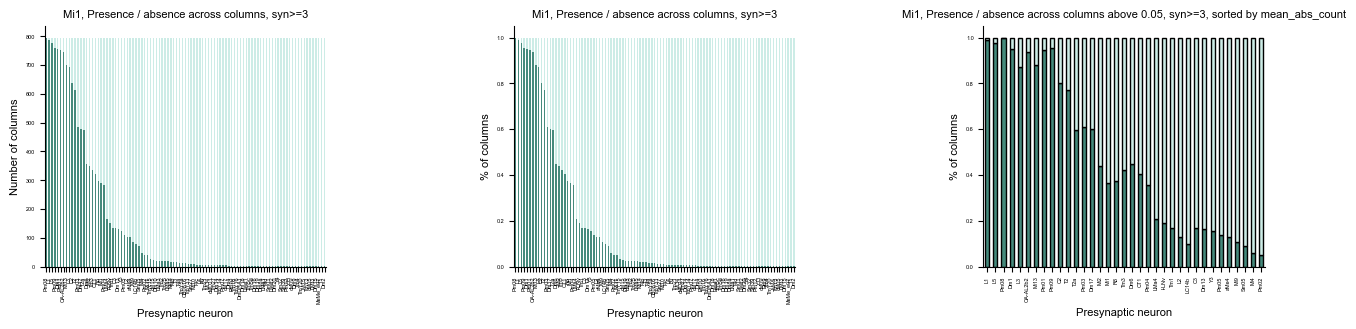

In [31]:
################################################ PLOTTING SECTION ##############################################
#################################################################################################################
#################################################################################################################

if plot_data:

    ################################################# BAR - PLOTS ##############################################
    ############################################################################################################

    #####################    Bar plots showing presence and absence of neuron partners  ########################
    #Figure
    fig, axs = plt.subplots(nrows =1, ncols = 3, figsize = (40*cm, 15*cm))
    fig.tight_layout(pad=10) # Adding some space between subplots

    color_absent = [204/255,236/255,230/255]
    color_present = [27/255,168/255,119/255]
    color_present = sns.color_palette(hex_color, as_cmap=False)[-1] # 



    # First axis
    sorted_abs_presence_absence_df.set_index('Presynaptic neuron').plot(kind='bar', stacked=True, color=[color_present, color_absent], 
                                                                        edgecolor = None, ax = axs[0],legend=False)
    axs[0].set_title(f'{neuron_of_interest}, Presence / absence across columns, syn>={min_desired_count}')
    axs[0].set_xlabel('Presynaptic neuron')
    axs[0].set_ylabel('Number of columns')
    axs[0].spines['right'].set_visible(False)
    axs[0].spines['top'].set_visible(False)


    # Next axis
    sorted_rel_presence_absence_df.set_index('Presynaptic neuron').plot(kind='bar', stacked=True, color=[color_present, color_absent], 
                                                                        edgecolor = None, ax = axs[1],legend=False)
    axs[1].set_title(f'{neuron_of_interest}, Presence / absence across columns, syn>={min_desired_count}')
    axs[1].set_xlabel('Presynaptic neuron')
    axs[1].set_ylabel('% of columns')
    axs[1].spines['right'].set_visible(False)
    axs[1].spines['top'].set_visible(False)

    # Next axis
    sorted_thr_rel_presence_absence_df['Presynaptic neuron_cat'] = pd.Categorical(
        sorted_thr_rel_presence_absence_df['Presynaptic neuron'], 
        categories=presence_threshold_sorted_column_order, 
        ordered=True
    )
    sorted_thr_rel_presence_absence_df.sort_values('Presynaptic neuron_cat', inplace = True)
    sorted_thr_rel_presence_absence_df.set_index('Presynaptic neuron').plot(kind='bar', stacked=True, color=[color_present, color_absent], 
                                                                        edgecolor = "black", ax = axs[2],legend=False)
    axs[2].set_title(f'{neuron_of_interest}, Presence / absence across columns above {presence_threshold}, syn>={min_desired_count}, sorted by {sort_by}')
    axs[2].set_xlabel('Presynaptic neuron')
    axs[2].set_ylabel('% of columns')
    axs[2].spines['right'].set_visible(False)
    axs[2].spines['top'].set_visible(False)

    #Plot saving
    if save_figures:
        figure_title = f'Percentage_columns_partner_presence_{dataset_name}_{neuron_of_interest}_{sort_by}.pdf'
        fig.savefig(os.path.join(save_path, figure_title))
        print('FIGURE: Percentatge across columns plotted and saved')
    #plt.close(fig)

FIGURE: Box-plots comparing categories


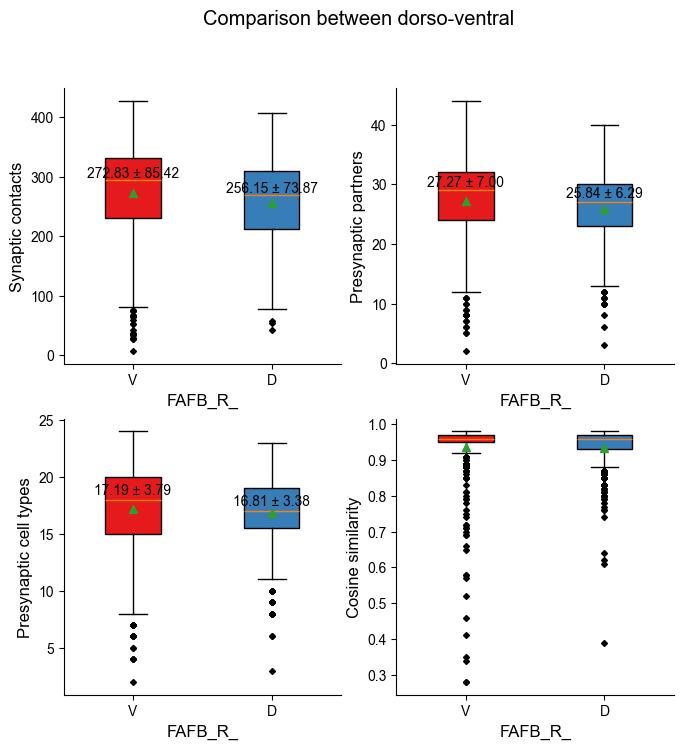

In [32]:
if plot_data:
    
    ############################################ BOX - PLOTS -BY CATEGORY ######################################
    ############################################################################################################


    fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(20*cm, 20*cm))
    fig.suptitle(f'Comparison between {category_column}')
    categories = syn_df[category_column].unique()
    positions = np.arange(len(categories))
    # Define a color palette
    color_palette = sns.color_palette(color_cat_set, len(categories))

    ################### Data first axis: Synaptic counts
    # Iterate over unique categories 
    for i, category in enumerate(categories):
        # Filter the data for the current category
        category_data = syn_df[syn_df[category_column] == category]
        
        # Compute grouped data for the current category
        category_grouped = category_data.groupby(['instance_post']).agg({'W': sum})
        
        # Plot the boxplot for the current category with the specified color
        box = axs[0, 0].boxplot(category_grouped['W'], positions=[positions[i]], widths=0.4, showmeans=True, patch_artist=True)

        # Customize the box color
        for patch in box['boxes']:
            patch.set_facecolor(color_palette[i])
        
        # Customize the outlier markers
        for patch in box['fliers']:
            patch.set(marker='D', markerfacecolor='black', markeredgecolor='black', markersize=3)

        # Add mean ± std as text above each boxplot
        x = positions[i]
        y = box['medians'][0].get_ydata()[0]
        mean = np.mean(category_grouped['W'])
        std = np.std(category_grouped['W'])
        text = f'{mean:.2f} ± {std:.2f}'
        axs[0, 0].text(x, y + 0.2, text, ha='center', va='bottom', fontsize=10)

    # Set the font size of y and x labels and ticks
    axs[0, 0].set_ylabel('Synaptic contacts', fontsize=12)
    axs[0, 0].set_xlabel(dataset_name, fontsize=12)
    axs[0, 0].tick_params(axis='both', which='both', labelsize=10)
    # Remove the background grid
    axs[0, 0].grid(False)
    # Remove the left and upper border lines
    axs[0, 0].spines['right'].set_visible(False)
    axs[0, 0].spines['top'].set_visible(False)
    # Set the x-axis tick positions and labels
    axs[0, 0].set_xticks(positions)
    axs[0, 0].set_xticklabels(categories)


    ################## Data next axis : Number of presynaptic partners
    # Iterate over unique categories in 'dorso-ventral'
    for i, category in enumerate(categories):
        # Filter the data for the current category
        category_data = syn_df[syn_df[category_column] == category]
        
        # Compute grouped data for the current category
        category_grouped = category_data.groupby(['instance_post']).agg({'type_pre': 'count'})
        
        # Plot the boxplot for the current category
        box = axs[0,1].boxplot(category_grouped['type_pre'], positions=[positions[i]], widths=0.4, showmeans=True, patch_artist= True)
        # Customize the box color
        for patch in box['boxes']:
            patch.set_facecolor(color_palette[i])
        
        # Customize the outlier markers
        for patch in box['fliers']:
            patch.set(marker='D', markerfacecolor='black', markeredgecolor='black', markersize=3) 
        
        # Add mean ± std as text above each boxplot
        x = positions[i]
        y = box['medians'][0].get_ydata()[0]
        mean = np.mean(category_grouped['type_pre'])
        std = np.std(category_grouped['type_pre'])
        text = f'{mean:.2f} ± {std:.2f}'
        axs[0, 1].text(x, y + 0.2, text, ha='center', va='bottom', fontsize=10)

    # Set the font size of y and x labels and ticks
    axs[0, 1].set_ylabel('Presynaptic partners', fontsize=12)
    axs[0, 1].set_xlabel(dataset_name, fontsize=12)
    axs[0, 1].tick_params(axis='both', which='both', labelsize=10)
    # Remove the background grid
    axs[0, 1].grid(False)
    # Remove the left and upper border lines
    axs[0, 1].spines['right'].set_visible(False)
    axs[0, 1].spines['top'].set_visible(False)
    # Set the x-axis tick positions and labels
    axs[0, 1].set_xticks(positions)
    axs[0, 1].set_xticklabels(categories)


    ############ Data next axis: Number of presynaptic cell types
    # Iterate over unique categories
    for i, category in enumerate(categories):
        # Filter the data for the current category
        category_data = syn_df[syn_df[category_column] == category]
        
        # Compute grouped data for the current category
        category_grouped = category_data.groupby(['instance_post']).agg({'type_pre': 'nunique'})
        
        # Plot the boxplot for the current category
        box = axs[1, 0].boxplot(category_grouped['type_pre'], positions=[positions[i]], widths=0.4, showmeans=True, patch_artist = True)
        # Customize the box color
        for patch in box['boxes']:
            patch.set_facecolor(color_palette[i])
        
        # Customize the outlier markers
        for patch in box['fliers']:
            patch.set(marker='D', markerfacecolor='black', markeredgecolor='black', markersize=3)
        
        # Add mean ± std as text above each boxplot
        x = positions[i]
        y = box['medians'][0].get_ydata()[0]
        mean = np.mean(category_grouped['type_pre'])
        std = np.std(category_grouped['type_pre'])
        text = f'{mean:.2f} ± {std:.2f}'
        axs[1, 0].text(x, y + 0.2, text, ha='center', va='bottom', fontsize=10)

    # Set the font size of y and x labels and ticks
    axs[1, 0].set_ylabel('Presynaptic cell types', fontsize=12)
    axs[1, 0].set_xlabel(dataset_name, fontsize=12)
    axs[1, 0].tick_params(axis='both', which='both', labelsize=10)
    # Remove the background grid
    axs[1, 0].grid(False)
    # Remove the left and upper border lines
    axs[1, 0].spines['right'].set_visible(False)
    axs[1, 0].spines['top'].set_visible(False)
    # Set the x-axis tick positions and labels
    axs[1, 0].set_xticks(positions)
    axs[1, 0].set_xticklabels(categories)


    ############ Data next axis: Cosine similarity
    if not d_v_filter:
        # Iterate over unique categories
        for i, category in enumerate(categories):
            # Filter the data for the current category
            category_grouped = cosine_sim_summary_df[cosine_sim_summary_df[category_column] == category]
            
            # Plot the boxplot for the current category
            box = axs[1, 1].boxplot(category_grouped['cosine_sim'], positions=[positions[i]], widths=0.4, showmeans=True, patch_artist = True)
            # Customize the box color
            for patch in box['boxes']:
                patch.set_facecolor(color_palette[i])
            
            # Customize the outlier markers
            for patch in box['fliers']:
                patch.set(marker='D', markerfacecolor='black', markeredgecolor='black', markersize=3) 
            
            # Add mean ± std as text above each boxplot
            x = positions[i]
            y = box['medians'][0].get_ydata()[0]
            mean = np.mean(category_grouped['cosine_sim'])
            std = np.std(category_grouped['cosine_sim'])
            text = f'{mean:.2f} ± {std:.2f}'

        # Set the font size of y and x labels and ticks
        axs[1, 1].set_ylabel('Cosine similarity', fontsize=12)
        axs[1, 1].set_xlabel(dataset_name, fontsize=12)
        axs[1, 1].tick_params(axis='both', which='both', labelsize=10)
        # Remove the background grid
        axs[1, 1].grid(False)
        # Remove the left and upper border lines
        axs[1, 1].spines['right'].set_visible(False)
        axs[1, 1].spines['top'].set_visible(False)
        # Set the x-axis tick positions and labels
        axs[1, 1].set_xticks(positions)
        axs[1, 1].set_xticklabels(categories)

        if save_figures:
            # Quick plot saving
            figure_title = f'\Counts-and-similarity-in_{dataset_name}_{neuron_of_interest}_by_{category_column}.pdf'
            fig.savefig(save_path+figure_title)
            print('FIGURE: Box-plots comparing categories')
        #plt.close(fig)

FIGURE: Linear correlations comparing categories


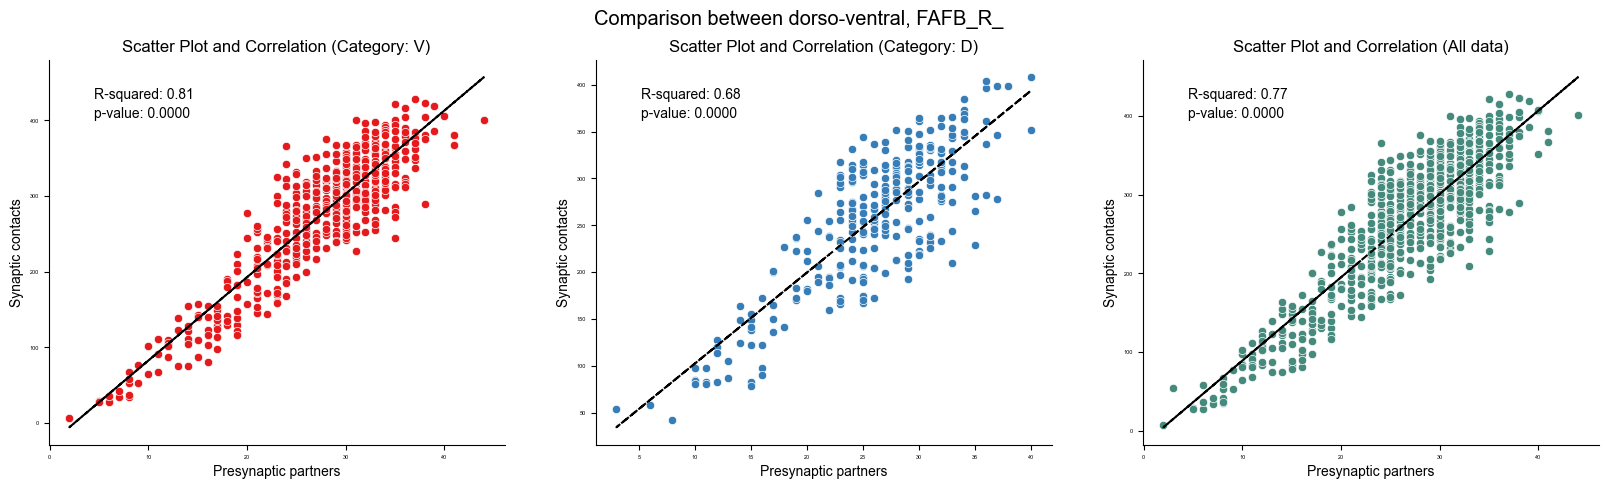

In [33]:
if plot_data:   
    ########################################  SCATTER PLOTS - BY CATEGORY ######################################
    #############################################    CORRELATIONS   ############################################

    ## TOTAL NUMBER OF SYNAPTIC COUNTS VS PARTNERS

    # Data
    all_W = syn_df.groupby(['instance_post']).agg({'W': sum})['W'].tolist()
    all_type_pre = syn_df.groupby(['instance_post']).agg({'type_pre': 'count'})['type_pre'].tolist()
    categories = syn_df[category_column].unique()

    #Figure
    # Initialize the figure
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    fig.suptitle(f'Comparison between {category_column}, {dataset_name}')

    # Define a color palette
    color_palette = sns.color_palette(color_cat_set, len(categories))

    for i, category in enumerate(categories):
        # Filter the data for the current category
        category_data = syn_df[syn_df[category_column] == category]
        
        # Compute grouped data for the current category
        category_W = category_data.groupby(['instance_post']).agg({'W': sum})['W'].tolist()
        category_type_pre = category_data.groupby(['instance_post']).agg({'type_pre': 'count'})['type_pre'].tolist()
        
        # Scatter plot for axs[0] and axs[2]
        sns.scatterplot(x=category_type_pre, y=category_W, color=color_palette[i], ax=axs[i])

        # Fit linear regression line and plot the diagonal reference line
        x, y = np.array(category_type_pre), np.array(category_W)
        slope, intercept = np.polyfit(x, y, 1)
        axs[i].plot(x, slope * x + intercept, color='black', linestyle='--')
        #axs[i].plot(x, x, color='gray', linestyle='--')

        # Compute Pearson correlation coefficient and p-value
        r_value, p_value = pearsonr(x, y)
        
        # Print R-squared and p-value
        axs[i].text(0.1, 0.9, f'R-squared: {r_value**2:.2f}', transform=axs[i].transAxes, fontsize=10)
        axs[i].text(0.1, 0.85, f'p-value: {p_value:.4f}', transform=axs[i].transAxes, fontsize=10)

        #Titles subplot
        axs[i].set_xlabel('Presynaptic partners', fontsize = 10)
        axs[i].set_ylabel('Synaptic contacts', fontsize = 10)
        axs[i].set_title(f'Scatter Plot and Correlation (Category: {category})', fontsize = 12)
        #Removing plot spines
        sns.despine(left=False, bottom=False)


    # Scatter plot and linear regression for axs[2]
    x_all, y_all = np.array(all_type_pre), np.array(all_W)
    sns.scatterplot(x=x_all, y=y_all, color=neuron_color, ax=axs[2])

    slope_all, intercept_all = np.polyfit(x_all, y_all, 1)
    axs[2].plot(x_all, slope_all * x_all + intercept_all, color='black', linestyle='--')

    r_value_all, p_value_all = pearsonr(x_all, y_all)

    # Print R-squared and p-value for axs[2]
    axs[2].text(0.1, 0.9, f'R-squared: {r_value_all**2:.2f}', transform=axs[2].transAxes, fontsize=10)
    axs[2].text(0.1, 0.85, f'p-value: {p_value_all:.4f}', transform=axs[2].transAxes, fontsize=10)

    # Set labels and title for each subplot
    axs[2].set_xlabel('Presynaptic partners', fontsize = 10)
    axs[2].set_ylabel('Synaptic contacts', fontsize = 10)
    axs[2].set_title('Scatter Plot and Correlation (All data)', fontsize = 12)

    #Removing plot spines
    sns.despine(left=False, bottom=False)

    if save_figures:
        # Quick plot saving
        figure_title = f'\Linear-correlations-in_{dataset_name}_{neuron_of_interest}.pdf'
        fig.savefig(save_path+figure_title)
        print('FIGURE: Linear correlations comparing categories')
    #plt.close(fig)

FIGURE: Visualization of instance counts plotted horizontally and saved


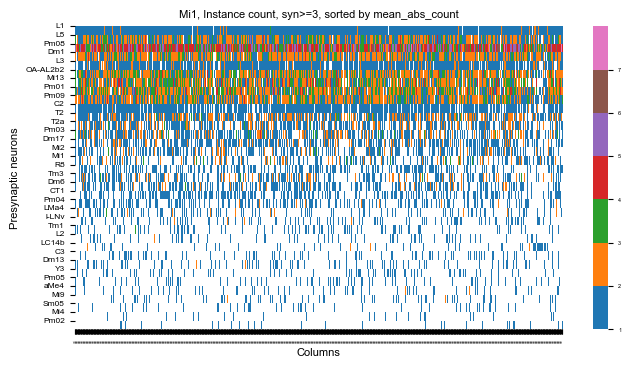

In [34]:
if plot_data:
    ############################################### HEATMAP - PLOTS ############################################
    ############################################################################################################


    ################################################ INSTANCE COUNTS ###########################################
    ## Visualizing instance (copies of the same neuron type) counts
    #Heatmap plots

    #Specifi color settings for instances:

    color_palette_name = "tab10" # "magma", "rocket", "tab10", "plasma", , "viridis", "flare"

    #Data filtering
    # filtering based on " presence_threshold"
    curr_df = counting_instances_df.T[presence_threshold_sorted_column_order].copy()

    #Sorting based on max, sum and count
    column_order = curr_df.max().sort_values(ascending=False).index.tolist() 
    curr_max_sorted_df = curr_df[column_order] # swapping order of columns
    column_order = curr_df.sum().sort_values(ascending=False).index.tolist() 
    curr_sum_sorted_df = curr_df[column_order] # swapping order of columns
    column_order = curr_df.count().sort_values(ascending=False).index.tolist() 
    curr_count_sorted_df = curr_df[column_order] # swapping order of columns

    #Sorting based on rank
    curr_rank_sorted_df = counting_instances_df.T[presence_threshold_sorted_column_order].copy()


    # Data
    _data =curr_rank_sorted_df 

    #Figure
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20*cm, 10*cm))
    max_count = int(max(counting_instances_df.max()))
    _palette = sns.color_palette(color_palette_name, max_count)

    # Plot (rotated 90 degrees)
    heatmap = sns.heatmap(cmap=_palette, data=_data.transpose(), vmin=1, vmax=max_count+1, 
                          cbar_kws={"ticks": list(range(1, max_count+1, 1)), "shrink": 1}, ax=axs, square=False)
    axs.set_title(f'{neuron_of_interest}, Instance count, syn>={min_desired_count}, sorted by {sort_by}')
    axs.set_xlabel('Columns')
    axs.set_ylabel('Presynaptic neurons')



    # Reducing font size of x-axis tick labels
    for tick_label in heatmap.get_xticklabels():
        tick_label.set_fontsize(tick_label.get_fontsize() * 0.2)

    # Reducing font size of y-axis tick labels
    for tick_label in heatmap.get_yticklabels():
        tick_label.set_fontsize(tick_label.get_fontsize() * 1.5)

    # Add ticks in the Y-axis for each row in "_data"
    axs.set_yticks(range(len(_data.transpose().index)))
    axs.set_yticklabels(_data.transpose().index)

    # Add ticks in the X-axis for each row in "_data"
    axs.set_xticks(range(len(_data.transpose().columns)))
    axs.set_xticklabels(_data.transpose().columns)


    #Plot saving
    if save_figures:
        figure_title = f'\Instance-count_{dataset_name}_{neuron_of_interest}_{sort_by}-horizontal.pdf'
        fig.savefig(save_path+figure_title)
        print('FIGURE: Visualization of instance counts plotted horizontally and saved')
    #plt.close(fig)

FIGURE: Visualization of relative counts plotted horizontally and saved


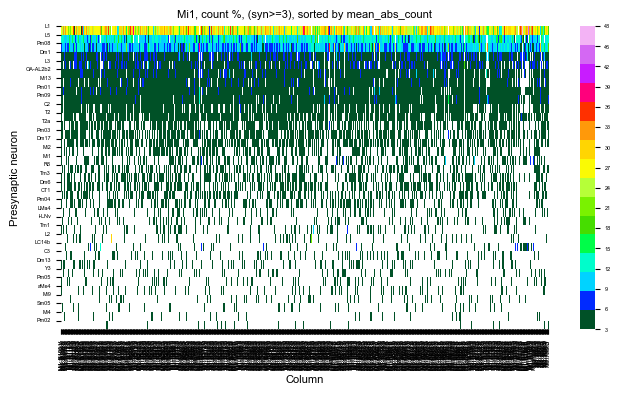

In [35]:
if plot_data:
    ################################################ RELATIVE  COUNTS  ##############################################
    # Visualization of presynaptic contact percentatge for all columns
    #Heatmap of presynaptic partners  colorcoded by relative synaptic count
    #Data
    _data = top_rank_popularity_rel_df[presence_threshold_sorted_column_order].copy()
    _vmin = min_desired_count
    _vmax= 48 # 48 is a common multiple of 3 and 4 #roundup(max(_data.max())) # rounding up to the next ten
    bin_width = 3# 5
    _palette = sns.color_palette("gist_ncar",n_colors=int(_vmax/bin_width))

    #Figure
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20*cm, 10*cm))

    sns.heatmap(cmap = _palette, vmin=_vmin, vmax=_vmax, data = _data.transpose(), cbar_kws={"shrink": 1}, ax=axs, square=False)
    axs.set_title(f'{neuron_of_interest}, count %, (syn>={min_desired_count}), sorted by {sort_by}')
    axs.set_xlabel('Column')
    axs.set_ylabel('Presynaptic neuron')


    # Reducing font size of x-axis tick labels
    for tick_label in heatmap.get_xticklabels():
        tick_label.set_fontsize(tick_label.get_fontsize() * 0.2)

    # Reducing font size of y-axis tick labels
    for tick_label in heatmap.get_yticklabels():
        tick_label.set_fontsize(tick_label.get_fontsize() * 1.5)

    # Add ticks in the Y-axis for each row in "_data"
    axs.set_yticks(range(len(_data.transpose().index)))
    axs.set_yticklabels(_data.transpose().index)

    # Add ticks in the X-axis for each row in "_data"
    axs.set_xticks(range(len(_data.transpose().columns)))
    axs.set_xticklabels(_data.transpose().columns)

    # Modify the legend ticks
    cbar = axs.collections[0].colorbar
    cbar.set_ticks(range(_vmin, _vmax + bin_width, bin_width))


    #Plot saving
    if save_figures:
        figure_title = f'\Relative-heatmap_{dataset_name}_{neuron_of_interest}_{sort_by}-horizontal.pdf'
        fig.savefig(save_path+figure_title)
        print('FIGURE: Visualization of relative counts plotted horizontally and saved')
    #plt.close(fig)


FIGURE: Visualization of absolute counts plotted horizontally and saved


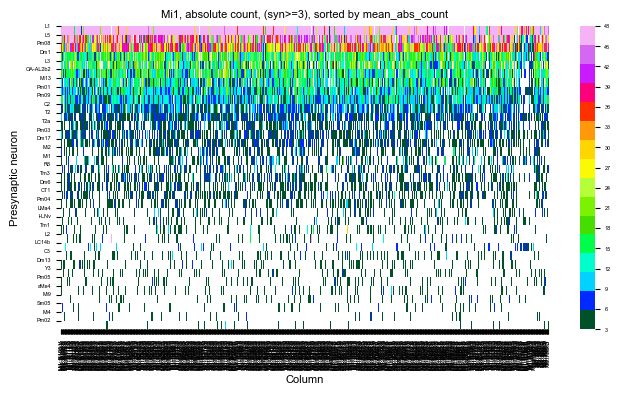

In [36]:
if plot_data:
    ################################################### ABSOLUTE COUNTS  ###########################################
    # Visualization of presynaptic contacts for all columns
    # Heatmap of presynaptic partners  colorcoded by absolute synaptic count


    #Data
    _data = top_rank_popularity_abs_df[presence_threshold_sorted_column_order].copy()
    _vmin = min_desired_count
    _vmax= 48 # 48 is a common multiple of 3 and 4 #roundup(max(_data.max())) # rounding up to the next ten
    bin_width = 3# 5
    _palette = sns.color_palette("gist_ncar",n_colors=int(_vmax/bin_width)) # 'rocket_r'


    #Figure
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20*cm, 10*cm))

    #First axis
    # Plot (rotated 90 degrees)
    sns.heatmap(cmap = _palette, vmin=_vmin, vmax=_vmax, data = _data.transpose(), cbar_kws={"shrink": 1}, ax=axs, square=False)
    axs.set_title(f'{neuron_of_interest}, absolute count, (syn>={min_desired_count}), sorted by {sort_by}')
    axs.set_xlabel('Column')
    axs.set_ylabel('Presynaptic neuron')


    # Reducing font size of x-axis tick labels
    for tick_label in heatmap.get_xticklabels():
        tick_label.set_fontsize(tick_label.get_fontsize() * 0.2)

    # Reducing font size of y-axis tick labels
    for tick_label in heatmap.get_yticklabels():
        tick_label.set_fontsize(tick_label.get_fontsize() * 1.5)

    # Add ticks in the Y-axis for each row in "_data"
    axs.set_yticks(range(len(_data.transpose().index)))
    axs.set_yticklabels(_data.transpose().index)

    # Add ticks in the X-axis for each row in "_data"
    axs.set_xticks(range(len(_data.transpose().columns)))
    axs.set_xticklabels(_data.transpose().columns)

    # Modify the legend ticks
    cbar = axs.collections[0].colorbar
    cbar.set_ticks(range(_vmin, _vmax + bin_width, bin_width))


    #Plot saving
    if save_figures:
        figure_title = f'\Absolute-heatmap_{dataset_name}_{neuron_of_interest}_{sort_by}-horizontal.pdf'
        fig.savefig(save_path+figure_title)
        print('FIGURE: Visualization of absolute counts plotted horizontally and saved')
    #plt.close(fig)

FIGURE: Visualization of ranks plotted horizontally and saved


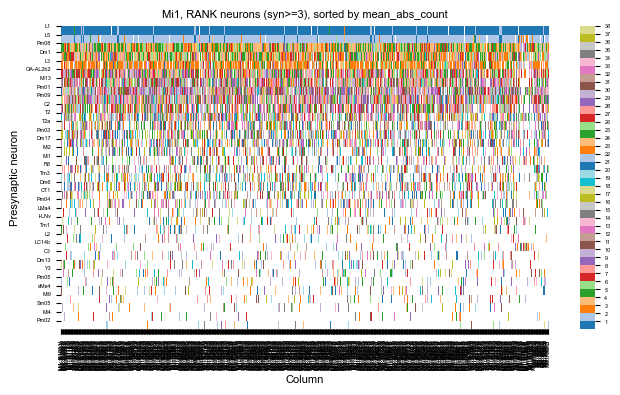

In [37]:
if plot_data:
    ################################################ NEURONAL RANK  #############################################
    # Visualization neuron´s ranks
    # Heatmap of presynaptic partners colorcoded by rank


    #Data
    _data = rank_df[presence_threshold_sorted_column_order].copy()
    total_num_ranks = int(max(_data.max()))

    #Figure 
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20*cm, 10*cm))
    _palette = sns.color_palette("tab20",n_colors=total_num_ranks)

    #First axis
    sns.heatmap(cmap = _palette, vmin=0, vmax=total_num_ranks, cbar_kws={"ticks":list(range(1,top_rank_df['rank'].max()+2,1)),"shrink": 1}, data = _data.transpose(), ax=axs, square=False)
    axs.set_title(f'{neuron_of_interest}, RANK neurons (syn>={min_desired_count}), sorted by {sort_by}')
    axs.set_xlabel('Column')
    #axes.set_yticklabels(id_column)
    axs.set_ylabel('Presynaptic neuron')


    # Reducing font size of x-axis tick labels
    for tick_label in heatmap.get_xticklabels():
        tick_label.set_fontsize(tick_label.get_fontsize() * 0.2)

    # Reducing font size of y-axis tick labels
    for tick_label in heatmap.get_yticklabels():
        tick_label.set_fontsize(tick_label.get_fontsize() * 1.5)

    # Add ticks in the Y-axis for each row in "_data"
    axs.set_yticks(range(len(_data.transpose().index)))
    axs.set_yticklabels(_data.transpose().index)

    # Add ticks in the X-axis for each row in "_data"
    axs.set_xticks(range(len(_data.transpose().columns)))
    axs.set_xticklabels(_data.transpose().columns)

    #Plot saving
    if save_figures:
        figure_title = f'\Rank-heatmap_{dataset_name}_{neuron_of_interest}_{sort_by}-horizontal.pdf'
        fig.savefig(save_path+figure_title)
        print('FIGURE: Visualization of ranks plotted horizontally and saved')

    #plt.close(fig)

FIGURE: Visualization of absolute counts plotted as stacked bars and saved


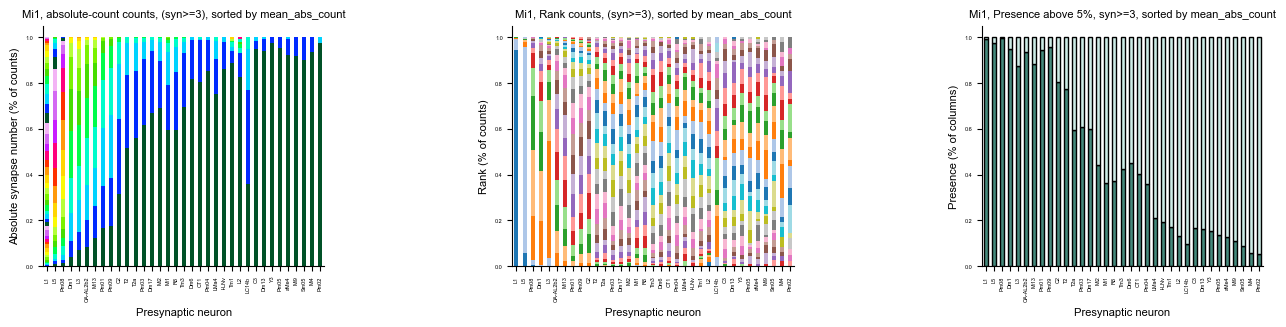

In [38]:
if plot_data:
    ############################################### STACKED BAR - PLOTS ############################################
    ################################################################################################################
    ################################# Binary, absolute counts and rank together ####################################
    #Seb coding here

    #Figure
    fig, axs = plt.subplots(nrows =1, ncols = 3, figsize = (40*cm, 15*cm))
    fig.tight_layout(pad=10) # Adding some space between subplots


    # First axis: Absolute counts

    # Data
    _data = top_rank_popularity_abs_df[presence_threshold_sorted_column_order].copy()#  filtering based on " presence_threshold"
    # Binning the data
    bin_width = 3
    binned_data = np.floor(_data / bin_width) * bin_width
    # Setting limits and colors
    _vmin = min_desired_count
    _vmax= 48 # 48 is a common multiple of 3 and 4 #roundup(max(_data.max())) # rounding up to the next ten
    bin_width = 3# 5
    _palette = sns.color_palette("gist_ncar",n_colors=int(_vmax/bin_width))

    # Get unique values across all columns
    unique_values = np.unique(binned_data.T.values)
    # Determine the colors for each unique value
    colors = _palette[:len(unique_values)]
    # Calculate the value counts for each column
    value_counts = binned_data.apply(lambda x: x.value_counts())
    value_counts_norm = value_counts.apply(lambda x: (x / x.sum()), axis=0)
    # Plot the stacked bar chart
    value_counts_norm.T.plot(kind='bar', stacked=True, color=colors, legend=False, ax = axs[0])
    # Set the x-axis and y-axis labels
    axs[0].set_xlabel('Presynaptic neuron')
    axs[0].set_ylabel('Absolute synapse number (% of counts)')
    # Set the x-axis tick labels
    axs[0].set_xticklabels(value_counts.T.index, rotation=90)
    # Set the plot title
    axs[0].set_title(f'{neuron_of_interest}, absolute-count counts, (syn>={min_desired_count}), sorted by {sort_by}')
    # Remove spines
    axs[0].spines['right'].set_visible(False)
    axs[0].spines['top'].set_visible(False)


    # Next axis: Ranks
    # Data
    _data = rank_df[presence_threshold_sorted_column_order].copy()#  filtering based on " presence_threshold"
    _palette = sns.color_palette("tab20",n_colors=total_num_ranks)
    # Determine the colors for each unique value
    colors = _palette[:len(unique_values)]
    # Calculate the value counts for each column
    value_counts = _data.apply(lambda x: x.value_counts())
    value_counts_norm = value_counts.apply(lambda x: (x / x.sum()), axis=0)
    # Plot the stacked bar chart
    value_counts_norm.T.plot(kind='bar', stacked=True, color=colors, legend=False, ax = axs[1])
    # Set the x-axis and y-axis labels
    axs[1].set_xlabel('Presynaptic neuron')
    axs[1].set_ylabel('Rank (% of counts)')
    # Set the x-axis tick labels
    axs[1].set_xticklabels(value_counts.T.index, rotation=90)
    # Set the plot title
    axs[1].set_title(f'{neuron_of_interest}, Rank counts, (syn>={min_desired_count}), sorted by {sort_by}')
    # Remove spines
    axs[1].spines['right'].set_visible(False)
    axs[1].spines['top'].set_visible(False)


    # Next axis: binary data
    sorted_thr_rel_presence_absence_df['Presynaptic neuron_cat'] = pd.Categorical(
        sorted_thr_rel_presence_absence_df['Presynaptic neuron'], 
        categories=presence_threshold_sorted_column_order, 
        ordered=True
    )
    sorted_thr_rel_presence_absence_df.sort_values('Presynaptic neuron_cat', inplace = True)
    sorted_thr_rel_presence_absence_df.set_index('Presynaptic neuron').plot(kind='bar', stacked=True, color=[color_present, color_absent], 
                                                                        edgecolor = "black", ax = axs[2],legend=False)
    axs[2].set_title(f'{neuron_of_interest}, Presence above {int(presence_threshold*100)}%, syn>={min_desired_count}, sorted by {sort_by}')
    #axs[2].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    axs[2].set_xlabel('Presynaptic neuron')
    axs[2].set_ylabel('Presence (% of columns)')
    # Remove spines
    axs[2].spines['right'].set_visible(False)
    axs[2].spines['top'].set_visible(False)



    #Plot saving
    if save_figures:
        figure_title = f'\Stacked-bar-plots_{dataset_name}_{neuron_of_interest}_{sort_by}.pdf'
        fig.savefig(save_path+figure_title)
        print('FIGURE: Visualization of absolute counts plotted as stacked bars and saved')
    #plt.close(fig)

Plotting relative-counts
FIGURE: Visualization of pearson correlation and hierarchical clustering plotted and saved


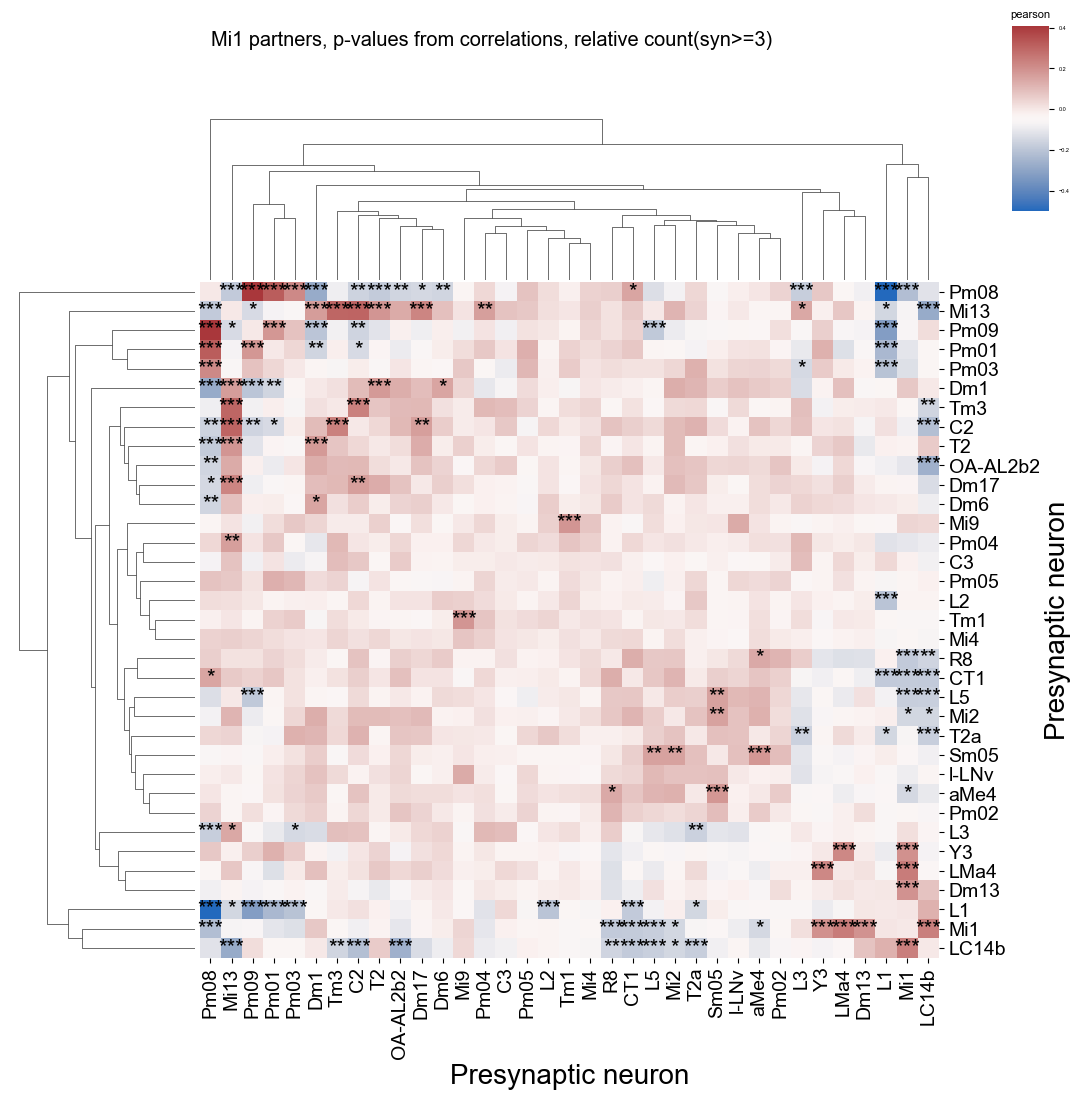

In [39]:
if plot_data:
    ############################################ CORRELATION MATRIXES  #############################################
    print(f'Plotting {relative_or_absolute}')
    # Visualization of Hieracrchical clustering
    # Heatmap of presynaptic partners' person correlation
    # Relative numbers
    if relative_or_absolute == 'relative-counts':
        correlation_rel_no_NaN_df.replace(np.NaN,0.0, inplace = True) # Relevant for the dendogram not to have NaNs (Set to 0.0 for color map purposes)
        _palette = sns.color_palette("vlag", as_cmap=True) # Diverging palette


        g = sns.clustermap(cmap = _palette, data = correlation_rel_no_NaN_df, annot = np.array(p_values_correlation_rel_no_NaN_df_asterix_df), fmt='', annot_kws={"size":16, "color": "k"})
        g.fig.suptitle(f'{neuron_of_interest} partners, p-values from correlations, relative count(syn>={min_desired_count})') 


        g.ax_heatmap.set_xlabel('Presynaptic neuron',fontsize = 20)
        g.ax_heatmap.set_ylabel('Presynaptic neuron',fontsize = 20)
        g.ax_heatmap.tick_params(axis='x', labelsize=14)
        g.ax_heatmap.tick_params(axis='y', labelsize=14)

        
        g.fig.subplots_adjust(top=0.9)
        x0, y0, _w, _h = g.cbar_pos
        g.ax_cbar.set_position([x0+1, y0, g.ax_cbar.get_position().width/5, g.ax_cbar.get_position().width])
        g.ax_cbar.set_title('pearson')



        #Plot saving
        if save_figures:
            figure_title = f'\Hierarchical-clustering-correlation-relative-counts_{dataset_name}_{neuron_of_interest}.pdf'
            g.savefig(save_path+figure_title)
            print('FIGURE: Visualization of pearson correlation and hierarchical clustering plotted and saved')
        #plt.close(g.fig)



    elif relative_or_absolute == 'absolute-counts':
        # Absolute numbers
        # Relevant for the dendogram not to have NaNs (Set to 0.0 for color map purposes)
        correlation_abs_no_NaN_df.replace(np.NaN,0.0, inplace = True) 
        _palette = sns.color_palette("vlag", as_cmap=True) # Diverging palette

        g = sns.clustermap(cmap = _palette, data = correlation_abs_no_NaN_df, annot = np.array(p_values_correlation_abs_no_NaN_df_asterix_df), fmt='', annot_kws={"size":16, "color": "k"})
        g.fig.suptitle(f'{neuron_of_interest} partners, p-values from correlations, absolute count(syn>={min_desired_count})') 


        g.ax_heatmap.set_xlabel('Presynaptic neuron',fontsize = 20)
        g.ax_heatmap.set_ylabel('Presynaptic neuron',fontsize = 20)
        g.ax_heatmap.tick_params(axis='x', labelsize=14)
        g.ax_heatmap.tick_params(axis='y', labelsize=14)
        g.fig.subplots_adjust(top=0.9)
        x0, y0, _w, _h = g.cbar_pos
        g.ax_cbar.set_position([x0+1, y0, g.ax_cbar.get_position().width/5, g.ax_cbar.get_position().width])
        g.ax_cbar.set_title('pearson')


        #Plot saving
        if save_figures:
            figure_title = f'\Hierarchical-clustering-correlation-absolute-counts_{dataset_name}_{neuron_of_interest}.pdf'
            g.savefig(save_path+figure_title)
            print('FIGURE: Visualization of pearson correlation and hierarchical clustering plotted and saved')
        #plt.close(g.fig)

FIGURE: Visualization of presynaptic partners contacts


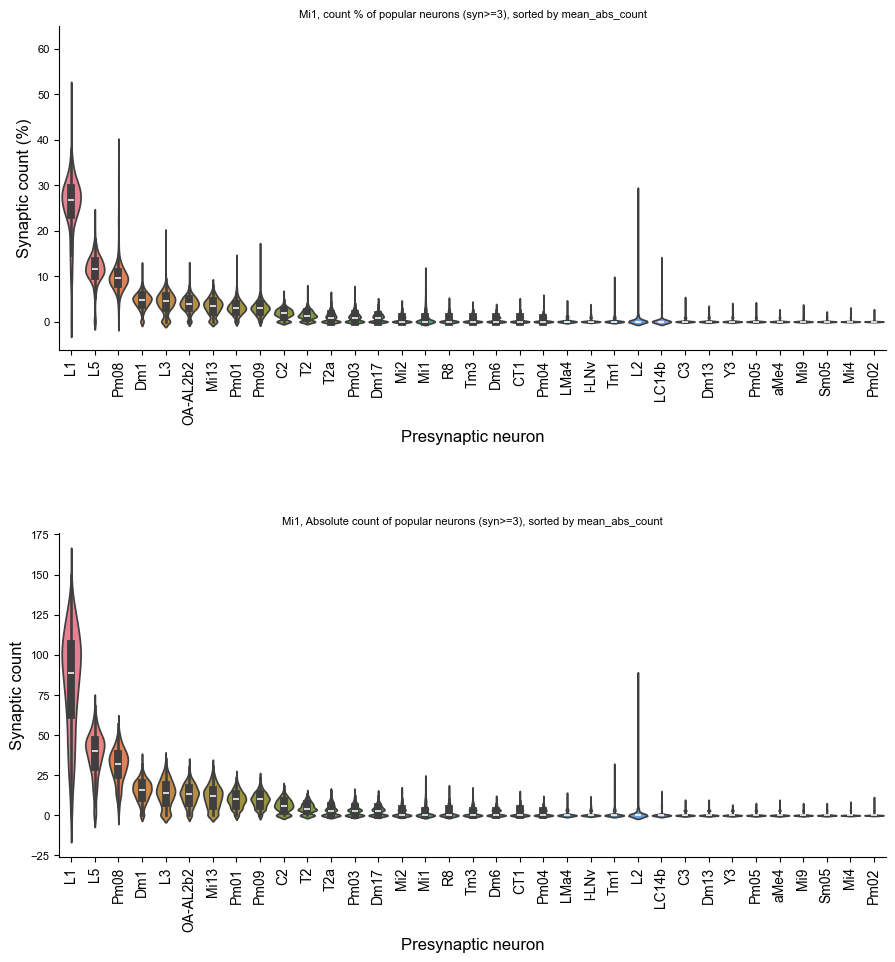

In [40]:
if plot_data:
    #############################################    VIOLIN-PLOTS     ##############################################
    ################################################################################################################

    ############################################# PRESYNAPTIC COUNTS ###############################################

    # Data
    if relative_or_absolute == 'absolute-counts':
        _data = top_rank_popularity_abs_df[presence_threshold_sorted_column_order].copy()
    elif relative_or_absolute == 'relative-counts':
        _data = top_rank_popularity_rel_df[presence_threshold_sorted_column_order].copy()

        dropped_indexes = []
        kept_indexes = []
        dropped_data = _data.dropna(how='all', inplace=False)
        dropped_indexes.extend(list(set(_data.index) - set(dropped_data.index)))
        kept_indexes.extend(dropped_data.index)



    # Relative and absolute counts across columns
    # Data
    _data = syn_popularity_rel_df.copy()[presence_threshold_sorted_column_order]

    dropped_indexes = []
    kept_indexes = []
    dropped_data = _data.dropna(how='all', inplace=False)
    dropped_indexes.extend(list(set(_data.index) - set(dropped_data.index)))
    kept_indexes.extend(dropped_data.index)


    data_zeros = _data.fillna(0)
    syn_df_grouped = syn_df.groupby(['instance_post','dorso-ventral','hemisphere']).agg({'W': sum}).loc[kept_indexes]
    syn_df_grouped.reset_index(level='dorso-ventral', inplace= True)
    syn_df_grouped.reset_index(level='hemisphere', inplace= True)
    data_zeros['hemisphere'] = syn_df_grouped['hemisphere']
    data_zeros = data_zeros.reset_index()



    #Figure
    fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(30*cm, 30*cm))
    fig.tight_layout(pad=10) # Adding some space between subplots

    # First axes
    sns.violinplot(data=data_zeros, ax=axs[0], scale='width')
    axs[0].set_title(f'{neuron_of_interest}, count % of popular neurons (syn>={min_desired_count}), sorted by {sort_by}')
    axs[0].set_ylabel('Synaptic count (%)', size=12)
    axs[0].set_xlabel('Presynaptic neuron', size=12)
    axs[0].tick_params(axis='x', rotation=90, labelsize=10)
    axs[0].tick_params(axis='y', labelsize=8)
    axs[0].set_ylim(top=65)  # Set same y lim for Tm9 and Tm1
    sns.despine(left=False, bottom=False)


    # Data
    _data = syn_popularity_abs_df.copy()[presence_threshold_sorted_column_order]

    dropped_indexes = []
    kept_indexes = []
    dropped_data = _data.dropna(how='all', inplace=False)
    dropped_indexes.extend(list(set(_data.index) - set(dropped_data.index)))
    kept_indexes.extend(dropped_data.index)


    data_zeros = _data.fillna(0)
    syn_df_grouped = syn_df.groupby(['instance_post','dorso-ventral','hemisphere']).agg({'W': sum}).loc[kept_indexes]
    syn_df_grouped.reset_index(level='dorso-ventral', inplace= True)
    syn_df_grouped.reset_index(level='hemisphere', inplace= True)
    data_zeros['hemisphere'] = syn_df_grouped['hemisphere']
    data_zeros = data_zeros.reset_index()

    # Next axes
    sns.violinplot(data=data_zeros, ax=axs[1], scale='width')
    axs[1].set_title(f'{neuron_of_interest}, Absolute count of popular neurons (syn>={min_desired_count}), sorted by {sort_by}')
    axs[1].set_ylabel('Synaptic count', size=12)
    axs[1].set_xlabel('Presynaptic neuron', size=12)
    axs[1].tick_params(axis='x', rotation=90, labelsize=10)
    axs[1].tick_params(axis='y', labelsize=8)
    sns.despine(left=False, bottom=False)


    #Plot saving
    if save_figures:
        figure_title = f'\Violin-plot-presynaptic-partners_{dataset_name}_{neuron_of_interest}_{sort_by}.pdf'
        fig.savefig(save_path+figure_title)
        print('FIGURE: Visualization of presynaptic partners contacts')
    #plt.close(fig)


FIGURE: Visualization of variability measures


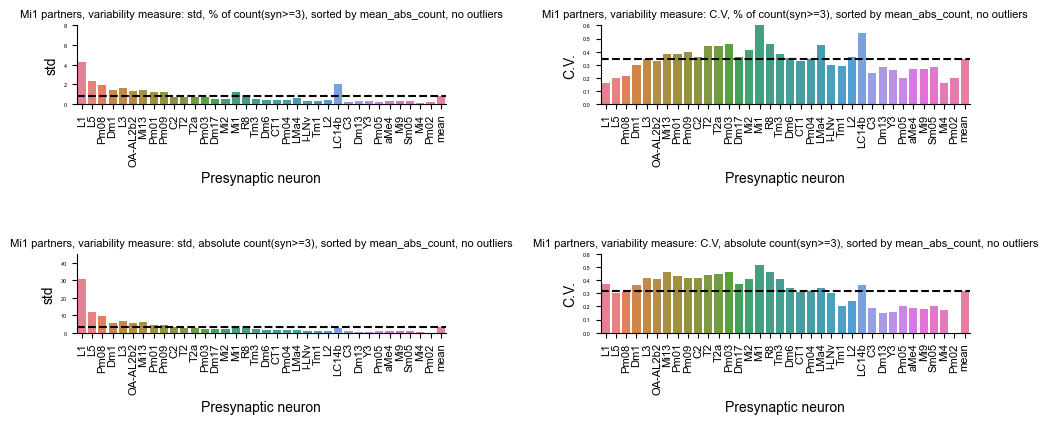

In [41]:
if plot_data:
    ################################################ BAR - PLOTS ################################################
    #############################################################################################################

    # Plotting bar plots of presynaptic counts
    # Quick plot across neurons of basic descriptive statistics of variability

    #Figure
    fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(30*cm, 15*cm))
    fig.tight_layout(pad=8) # Adding some space between subplots

    #Data
    if exclude_outliers:
        _data = curr_rel_stats_no_ouliers_df.round(2).copy()[presence_threshold_sorted_column_order+['mean']]
        figure_title = f'\Variability-measures_{dataset_name}_{neuron_of_interest}_{sort_by}_no_outliers.pdf'
        axs[0,0].set_title(f'{neuron_of_interest} partners, variability measure: std, % of count(syn>={min_desired_count}), sorted by {sort_by}, no outliers')
        axs[0,1].set_title(f'{neuron_of_interest} partners, variability measure: C.V, % of count(syn>={min_desired_count}), sorted by {sort_by}, no outliers')
    else: 
        _data = curr_rel_stats_df.round(2).copy()[presence_threshold_sorted_column_order+['mean']]
        figure_title = f'\Variability-measures_{dataset_name}_{neuron_of_interest}_{sort_by}.pdf'
        axs[0,0].set_title(f'{neuron_of_interest} partners, variability measure: std, % of count(syn>={min_desired_count}), sorted by {sort_by}')
        axs[0,1].set_title(f'{neuron_of_interest} partners, variability measure: C.V, % of count(syn>={min_desired_count}), sorted by {sort_by}')

    # First axis
    sns.barplot(data=_data.iloc[[2]], ax=axs[0, 0])
    axs[0, 0].axhline(y=_data.iloc[[2]]['mean'][0], color='k', linestyle='dashed')
    axs[0, 0].set_ylabel(_data.index[2], size=10)
    axs[0, 0].set_xlabel('Presynaptic neuron', size=10)
    axs[0, 0].tick_params(axis='x', rotation=90, labelsize=8)
    axs[0, 0].set_ylim(0, 8)
    sns.despine(left=False, bottom=False)


    # Next axis
    sns.barplot(data=_data.iloc[[-1]], ax=axs[0, 1])
    axs[0, 1].axhline(y=_data.iloc[[-1]]['mean'][0], color='k', linestyle='dashed')
    axs[0, 1].set_ylabel(_data.index[-1], size=10)
    axs[0, 1].set_xlabel('Presynaptic neuron', size=10)
    axs[0, 1].tick_params(axis='x', rotation=90, labelsize=8)
    axs[0, 1].set_ylim(0, 0.6)
    sns.despine(left=False, bottom=False)


    #Data
    if exclude_outliers:
        _data = curr_abs_stats_no_ouliers_df.round(2).copy()[presence_threshold_sorted_column_order+['mean']]
        axs[1,0].set_title(f'{neuron_of_interest} partners, variability measure: std, absolute count(syn>={min_desired_count}), sorted by {sort_by}, no outliers')
        axs[1,1].set_title(f'{neuron_of_interest} partners, variability measure: C.V, absolute count(syn>={min_desired_count}), sorted by {sort_by}, no outliers')
    else: 
        _data = curr_abs_stats_df.round(2).copy()[presence_threshold_sorted_column_order+['mean']]
        axs[1,0].set_title(f'{neuron_of_interest} partners, variability measure: std, absolute count(syn>={min_desired_count}), sorted by {sort_by}')
        axs[1,1].set_title(f'{neuron_of_interest} partners, variability measure: C.V, absolute count(syn>={min_desired_count}), sorted by {sort_by}')

    # Third axis
    sns.barplot(data=_data.iloc[[2]], ax=axs[1, 0])
    axs[1, 0].axhline(y=_data.iloc[[2]]['mean'][0], color='k', linestyle='dashed')
    axs[1, 0].set_ylabel(_data.index[2], size=10)
    axs[1, 0].set_xlabel('Presynaptic neuron', size=10)
    axs[1, 0].tick_params(axis='x', rotation=90, labelsize=8)
    axs[1, 0].set_ylim(0, 45)
    sns.despine(left=False, bottom=False)

    # Fourth axis
    sns.barplot(data=_data.iloc[[-1]], ax=axs[1, 1])
    axs[1, 1].axhline(y=_data.iloc[[-1]]['mean'][0], color='k', linestyle='dashed')
    axs[1, 1].set_ylabel(_data.index[-1], size=10)
    axs[1, 1].set_xlabel('Presynaptic neuron', size=10)
    axs[1, 1].tick_params(axis='x', rotation=90, labelsize=8)
    axs[1, 1].set_ylim(0, 0.6)
    sns.despine(left=False, bottom=False)


    #Plot saving
    if save_figures:
        fig.savefig(save_path+figure_title)
        print('FIGURE: Visualization of variability measures')
    #plt.close(fig)


In [43]:
if plot_data:
    ############################################### NEUROPIL - PLOTS ############################################
    #############################################################################################################


    ################################################ BINARY COUNTs ###############################################
    #Plotting a single neuron

    _data = binary_df[presence_threshold_sorted_column_order] # FIlter abnd sorting

    #Gettting the center point in specific neuropile from database
    xyz_neuropil = 'XYZ-ME'
    xyz_df = database_df[database_df['seg_id'].isin(root_ids)].copy()
    xyz_pre = xyz_df[xyz_neuropil].tolist()
    # Split each string by comma and convert the elements to floats
    xyz_pre_arr = np.array([list(map(float, s.split(','))) for s in xyz_pre])
    xyz_pre_arr_new = xyz_pre_arr * np.array([4,4,40])


    ################################################ BINARY COUNTs ###############################################
    # Plotting all neurons in the same pdf page
    # Data
    _data = binary_df[presence_threshold_sorted_column_order] # FIlter abnd sorting

    # Assuming pre_partner_list is a list of objects to be plotted
    pre_partner_list = _data.columns.tolist()
    OL_R = flywire.get_neuropil_volumes([mesh_ME])

    # Create a PDF file to save the plots
    figure_title = f'\Meshes_XYZ_positions_ME_binary_all_partners_{dataset_name}_{neuron_of_interest}.pdf'
    outputPath =  save_path + figure_title
    pdf_pages = PdfPages(outputPath)

    # Calculate the number of rows and columns for the grid layout
    num_plots = len(pre_partner_list)
    num_cols = 4  # Adjust the number of columns as needed
    num_rows = (num_plots - 1) // num_cols + 1

    # Set the figure size based on DIN4 page size
    fig_width = 8.27 *2  # Width of DIN4 page in inches
    fig_height = 11.69  *2 # Height of DIN4 page in inches

    # Calculate the size of each subplot
    subplot_width = fig_width / num_cols * 4  # Adjust the multiplier as needed
    subplot_height = fig_height / num_rows * 4  # Adjust the multiplier as needed

    # Calculate the size of the plotted content
    content_width = subplot_width * 0.9  # Adjust the multiplier as needed
    content_height = subplot_height * 0.9  # Adjust the multiplier as needed

    # Create the figure and subplot grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), subplot_kw={'projection': '3d'})

    # Set the size of the plotted content in each subplot
    for ax in axes.flatten():
        ax.set_box_aspect([content_width, content_height, content_height])

    # Flatten the axes array if it's a 1D array
    if num_plots == 1:
        axes = [axes]

    # Loop through the objects and create subplots
    for i, (pre_partner, ax) in enumerate(zip(pre_partner_list, axes.flatten())):
        # Generate the plot for the current object
        dot_sizes = _data[pre_partner].fillna(0).tolist()
        dot_sizes_ME = [size * 10 for size in dot_sizes]  # Increase size by a factor of X

        # Plot the object
        ax.scatter(
            xyz_pre_arr_new[:, 0],
            xyz_pre_arr_new[:, 1],
            xyz_pre_arr_new[:, 2],
            s=dot_sizes_ME,
            c=neuron_color,
            alpha=0.9
        )
        ax.scatter(xyz_pre_arr_new[:, 0], xyz_pre_arr_new[:, 1], xyz_pre_arr_new[:, 2], s=2,c='k',alpha=1) # All dots
        navis.plot2d([OL_R], method='3d_complex', ax=ax,scalebar = '20 um') #

        # Rotating the view
        ax.azim = mesh_azim 
        ax.elev = mesh_elev 

        # Set plot title
        ax.set_title(f"Presynaptic partner: {pre_partner}", fontsize = 8)

        # Remove ticks and tick labels from XYZ axes
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])

        # Remove the spines (axis lines)
        ax.spines['left'].set_visible(False)

        # Remove axes lines
        ax.xaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
        ax.yaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
        ax.zaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
        ax.xaxis.line.set_linewidth(0.0)
        ax.yaxis.line.set_linewidth(0.0)
        ax.zaxis.line.set_linewidth(0.0)
        
        # Remove background panes
        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        
        # Hide axis lines and tick markers
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.zaxis.set_visible(False)
        
        # Turn off the axis
        ax.set_axis_off()

        # Remove grid lines
        ax.grid(False)

        # Remove the axis marker
        ax._axis3don = False

        ax.axis('off')

        # Add any additional customization to the plot

    # Remove empty subplots
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    # Adjust the spacing between subplots
    fig.subplots_adjust(wspace=0, hspace=0)
    fig.tight_layout(pad=0)

    # Adjust the spacing between subplots and between the title and the plot
    fig.subplots_adjust(wspace=0, hspace=0, top=0.85)

    # Save the figure with subplots to the PDF file
    pdf_pages.savefig(fig, bbox_inches='tight', pad_inches=0)

    # Close the figure and PDF file
    plt.close(fig)
    pdf_pages.close()

    print(f"Plots saved in {outputPath}")

Plots saved in D:\Connectomics-Data\FlyWire\Pdf-plots\Meshes_XYZ_positions_ME_binary_all_partners_FAFB_R__Mi1.pdf


In [44]:
if plot_data:
    ################################################ INSTANCE COUNTS ##############################################
    ## Visualizing instance (copies of the same neuron type) counts
    # Plots for single neurons of interest

    #Gettting the center point in specific neuropile from database
    xyz_neuropil = 'XYZ-ME'
    xyz_df = database_df[database_df['seg_id'].isin(root_ids)].copy()
    xyz_pre = xyz_df[xyz_neuropil].tolist()
    # Split each string by comma and convert the elements to floats
    xyz_pre_arr = np.array([list(map(float, s.split(','))) for s in xyz_pre])
    xyz_pre_arr_new = xyz_pre_arr * np.array([4,4,40])


    # Plotting all neurons in the same pdf page
    # Data
    _data = counting_instances_df.T[presence_threshold_sorted_column_order] # FIlter abnd sorting

    # Assuming pre_partner_list is a list of objects to be plotted
    pre_partner_list = _data.columns.tolist()
    OL_R = flywire.get_neuropil_volumes([mesh_ME])

    # Create a PDF file to save the plots
    figure_title = f'\Meshes_XYZ_positions_ME_instance_counts_all_partners_{dataset_name}_{neuron_of_interest}.pdf'
    outputPath =  save_path + figure_title
    pdf_pages = PdfPages(outputPath)

    # Calculate the number of rows and columns for the grid layout
    num_plots = len(pre_partner_list)
    num_cols = 4  # Adjust the number of columns as needed
    num_rows = (num_plots - 1) // num_cols + 1

    # Set the figure size based on DIN4 page size
    fig_width = 8.27 *2  # Width of DIN4 page in inches
    fig_height = 11.69  *2 # Height of DIN4 page in inches

    # Calculate the size of each subplot
    subplot_width = fig_width / num_cols * 4  # Adjust the multiplier as needed
    subplot_height = fig_height / num_rows * 4  # Adjust the multiplier as needed

    # Calculate the size of the plotted content
    content_width = subplot_width * 0.9  # Adjust the multiplier as needed
    content_height = subplot_height * 0.9  # Adjust the multiplier as needed

    # Create the figure and subplot grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), subplot_kw={'projection': '3d'})

    # Set the size of the plotted content in each subplot
    for ax in axes.flatten():
        ax.set_box_aspect([content_width, content_height, content_height])

    # Flatten the axes array if it's a 1D array
    if num_plots == 1:
        axes = [axes]

    # Loop through the objects and create subplots
    for i, (pre_partner, ax) in enumerate(zip(pre_partner_list, axes.flatten())):
        # Generate the plot for the current object
        dot_sizes = _data[pre_partner].fillna(0).tolist()
        dot_sizes_ME = [size * 5 for size in dot_sizes]  # Increase size by a factor of X

        size_color_map = {}
        color_palette = sns.color_palette(color_palette_name, int(max(counting_instances_df.max()))) 

        #Dot colors
        dot_colors = []

        
        for size in dot_sizes:
            if size != 0.0 and size not in size_color_map:
                size_color_map[size] = color_palette[len(size_color_map)] #TODO Think how to improve this line to fix the colors!
            #dot_colors.append(size_color_map.get(size, (1.0, 1.0, 1.0)) if size != 0.0 else (1.0, 1.0, 1.0))
            color = size_color_map.get(size, (1.0, 1.0, 1.0)) if size != 0.0 else (1.0, 1.0, 1.0)
            color = (*color[:3], 1.0)  # Make color fully opaque
            dot_colors.append(color)

        # Plot the object
        ax.scatter(
            xyz_pre_arr_new[:, 0],
            xyz_pre_arr_new[:, 1],
            xyz_pre_arr_new[:, 2],
            s=dot_sizes_ME,
            c=dot_colors,
            alpha=0.9
        )
        ax.scatter(xyz_pre_arr_new[:, 0], xyz_pre_arr_new[:, 1], xyz_pre_arr_new[:, 2], s=1,c='k',alpha=1) # All dots
        navis.plot2d([OL_R], method='3d_complex', ax=ax,scalebar = '20 um') #

        # Rotating the view
        ax.azim = mesh_azim 
        ax.elev = mesh_elev 

        # Set plot title
        ax.set_title(f"Presynaptic partner: {pre_partner}", fontsize = 8)

        # Remove ticks and tick labels from XYZ axes
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])

        # Remove the spines (axis lines)
        ax.spines['left'].set_visible(False)

        # Remove axes lines
        ax.xaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
        ax.yaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
        ax.zaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
        ax.xaxis.line.set_linewidth(0.0)
        ax.yaxis.line.set_linewidth(0.0)
        ax.zaxis.line.set_linewidth(0.0)
        
        # Remove background panes
        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        
        # Hide axis lines and tick markers
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.zaxis.set_visible(False)
        
        # Turn off the axis
        ax.set_axis_off()

        # Remove grid lines
        ax.grid(False)

        # Remove the axis marker
        ax._axis3don = False

        ax.axis('off')

        # Add any additional customization to the plot

    # Remove empty subplots
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    # Adjust the spacing between subplots
    fig.subplots_adjust(wspace=0, hspace=0)
    fig.tight_layout(pad=0)

    # Adjust the spacing between subplots and between the title and the plot
    fig.subplots_adjust(wspace=0, hspace=0, top=0.85)

    # Save the figure with subplots to the PDF file
    pdf_pages.savefig(fig, bbox_inches='tight', pad_inches=0)

    # Close the figure and PDF file
    plt.close(fig)
    pdf_pages.close()

    print(f"Plots saved in {outputPath}")

Plots saved in D:\Connectomics-Data\FlyWire\Pdf-plots\Meshes_XYZ_positions_ME_instance_counts_all_partners_FAFB_R__Mi1.pdf
